In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import boxcox,yeojohnson
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.shape

(571, 43)

In [4]:
df.shape[0] 

571

In [5]:
df.shape[1]

43

In [6]:
df.isnull()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<Axes: >

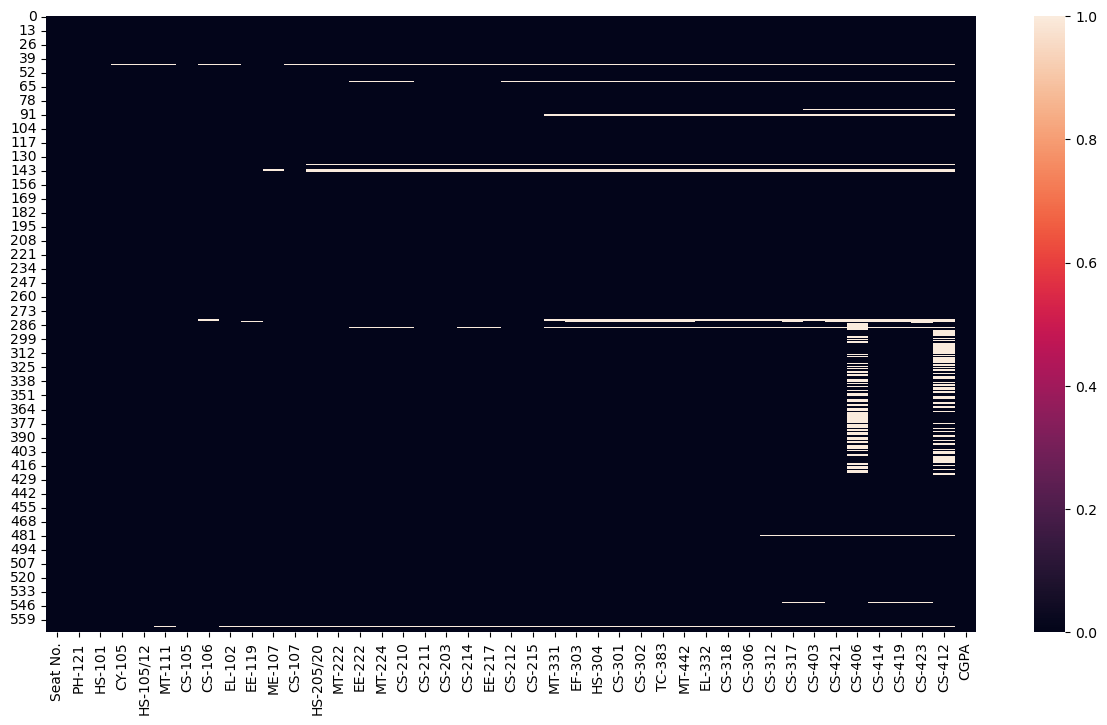

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [9]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [10]:
df['CS-406'].value_counts()

A-    177
A      79
B+     64
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
WU      1
Name: CS-406, dtype: int64

In [11]:
df['CS-406']=df['CS-406'].fillna('A-')

In [12]:
df['CS-301'].value_counts()

A-    108
B+     74
B      71
A      66
B-     60
C      41
C+     37
C-     36
D      29
D+     29
A+      9
F       1
Name: CS-301, dtype: int64

In [13]:
df['CS-301']=df['CS-301'].fillna('A-')

In [14]:
df['HS-304']=df['HS-304'].fillna('A-')

In [15]:
df['EF-303'].value_counts()

B     112
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
D      19
A      14
F       2
WU      1
Name: EF-303, dtype: int64

In [16]:
df['EF-303']=df['EF-303'].fillna('B')

In [17]:
df['CS-302'].value_counts()

A-    113
B     102
A      86
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: CS-302, dtype: int64

In [18]:
df['CS-302']=df['CS-302'].fillna('A-')

In [19]:
df['TC-383'].value_counts()

A     105
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64

In [20]:
df['TC-383']=df['TC-383'].fillna('A')

In [21]:
df['TC-383'].mode()

0    A
Name: TC-383, dtype: object

In [22]:
df['MT-442'].value_counts()

A-    140
A     130
B+     65
B      47
A+     39
B-     30
C-     28
C+     24
C      24
D      20
D+     13
F       1
Name: MT-442, dtype: int64

In [23]:
df['MT-442'].mode()

0    A-
Name: MT-442, dtype: object

In [24]:
df['EL-332'].value_counts()

A-    96
A     76
B+    68
B     67
B-    62
C     49
C+    38
C-    32
D+    22
D     22
A+    20
F      9
WU     1
Name: EL-332, dtype: int64

In [25]:
df['EL-332']=df['EL-332'].fillna('A-')

In [26]:
df['CS-318'].value_counts()

A-    89
B-    69
B     68
B+    65
C     53
C+    49
A     42
C-    40
D     36
D+    29
F     10
A+     6
WU     5
W      1
Name: CS-318, dtype: int64

In [27]:
df['CS-318']=df['CS-318'].fillna('A-')

In [28]:
df['CS-306'].value_counts()

A-    120
B+     75
A      74
B-     64
B      53
C-     40
C      37
C+     36
D      31
D+     18
A+     10
F       3
WU      1
Name: CS-306, dtype: int64

In [29]:
df['CS-306']=df['CS-306'].fillna('A-')

In [30]:
df['CS-312'].value_counts()

A+    93
A     86
A-    63
D+    52
C     48
C-    44
B+    42
B     37
C+    37
B-    36
D     19
F      2
W      1
WU     1
Name: CS-312, dtype: int64

In [31]:
df['CS-312']=df['CS-312'].fillna('A+')

In [32]:
df['CS-317'].value_counts()

B-    79
B     75
C     70
A-    66
B+    58
C+    57
A     47
C-    41
D+    34
D     16
A+     9
F      7
Name: CS-317, dtype: int64

In [33]:
df['CS-317']=df['CS-317'].fillna('B-')

In [34]:
df['CS-403'].value_counts()

A     133
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       4
Name: CS-403, dtype: int64

In [35]:
df['CS-403']=df['CS-403'].fillna('A')

In [36]:
df['CS-421'].value_counts()

B     86
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
D+    36
A     25
D     21
F     17
A+     2
W      2
Name: CS-421, dtype: int64

In [37]:
df['CS-421']=df['CS-421'].fillna('B')

In [38]:
df['CS-414'].value_counts()

A     176
A-    156
B+     62
B      54
B-     21
A+     21
C+     21
C      20
C-     12
F       7
D+      3
D       3
W       2
Name: CS-414, dtype: int64

In [39]:
df['CS-414']=df['CS-414'].fillna('A')

In [40]:
df['CS-419'].value_counts()

A-    120
B      89
B+     85
B-     78
A      56
C+     46
C      40
C-     20
D+     13
D       7
A+      2
F       2
Name: CS-419, dtype: int64

In [41]:
df['CS-419']=df['CS-419'].fillna('A-')

In [42]:
df['CS-423'].value_counts()

A-    122
A      78
B+     75
B      65
B-     56
C      45
C+     39
C-     29
D+     25
D      15
F       5
A+      3
Name: CS-423, dtype: int64

In [43]:
df['CS-423']=df['CS-423'].fillna('A-')

In [44]:
df['CS-412'].value_counts()

A-    157
B+     80
A      77
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: CS-412, dtype: int64

In [45]:
df['CS-412']=df['CS-412'].fillna('A-')

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [48]:
df.shape

(561, 43)

In [49]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   561 non-null    object 
 1   PH-121     561 non-null    object 
 2   HS-101     561 non-null    object 
 3   CY-105     561 non-null    object 
 4   HS-105/12  561 non-null    object 
 5   MT-111     561 non-null    object 
 6   CS-105     561 non-null    object 
 7   CS-106     561 non-null    object 
 8   EL-102     561 non-null    object 
 9   EE-119     561 non-null    object 
 10  ME-107     561 non-null    object 
 11  CS-107     561 non-null    object 
 12  HS-205/20  561 non-null    object 
 13  MT-222     561 non-null    object 
 14  EE-222     561 non-null    object 
 15  MT-224     561 non-null    object 
 16  CS-210     561 non-null    object 
 17  CS-211     561 non-null    object 
 18  CS-203     561 non-null    object 
 19  CS-214     561 non-null    object 
 20  EE-217    

In [51]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [52]:
df.drop(['Seat No.'],axis=1,inplace=True)
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [53]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [54]:
uniques=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for i in uniques:
    print(str(i),'=',df[i].unique(),'in this column has total',len(df[i].unique()),'unique values.','\n')

PH-121 = ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'A+'] in this column has total 11 unique values. 

HS-101 = ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+'] in this column has total 11 unique values. 

CY-105 = ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'A+'] in this column has total 11 unique values. 

HS-105/12 = ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'A+'] in this column has total 11 unique values. 

MT-111 = ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'A+' 'F'] in this column has total 12 unique values. 

CS-105 = ['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D'] in this column has total 11 unique values. 

CS-106 = ['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 'A+'] in this column has total 11 unique values. 

EL-102 = ['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'A+'] in this column has total 11 unique values. 

EE-119 = ['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'A+'] in this column has total 11 unique values. 

ME-107 = ['C-' 'D' 'A-' 'C+' '

In [55]:
Count=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
 

In [56]:
for i in Count:
    print(str(i))
    

PH-121
HS-101
CY-105
HS-105/12
MT-111
CS-105
CS-106
EL-102
EE-119
ME-107
CS-107
HS-205/20
MT-222
EE-222
MT-224
CS-210
CS-211
CS-203
CS-214
EE-217
CS-212
CS-215
MT-331
EF-303
HS-304
CS-301
CS-302
TC-383
MT-442
EL-332
CS-318
CS-306
CS-312
CS-317
CS-403
CS-421
CS-406
CS-414
CS-419
CS-423
CS-412


<Axes: xlabel='CGPA', ylabel='Count'>

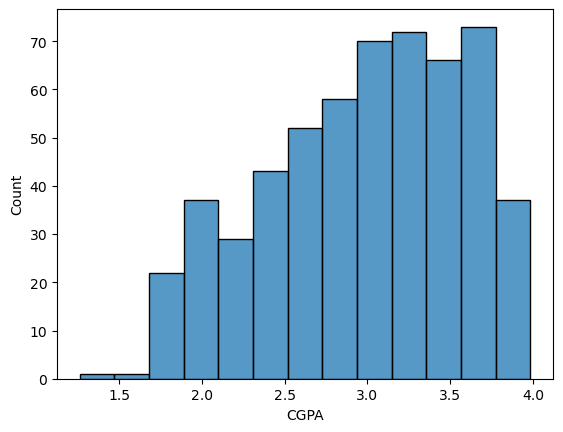

In [57]:
sns.histplot(df['CGPA'])

In [58]:
le=LabelEncoder()
for i in df.drop(['CGPA'],axis=1):
    df[i]=le.fit_transform(df[i])
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [59]:
df.dtypes

PH-121         int32
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int32
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331         int32
EF-303         int32
HS-304         int32
CS-301         int32
CS-302         int32
TC-383         int32
MT-442         int32
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317         int32
CS-403         int32
CS-421         int32
CS-406         int32
CS-414         int32
CS-419         int32
CS-423         int32
CS-412         int32
CGPA         float64
dtype: object

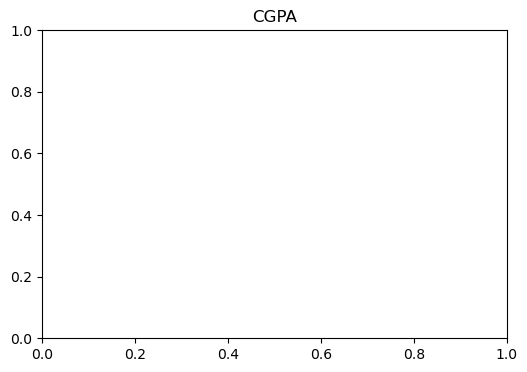

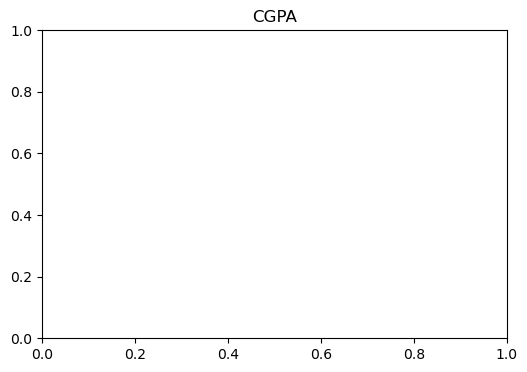

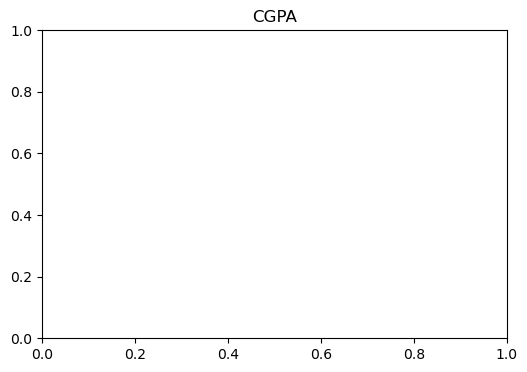

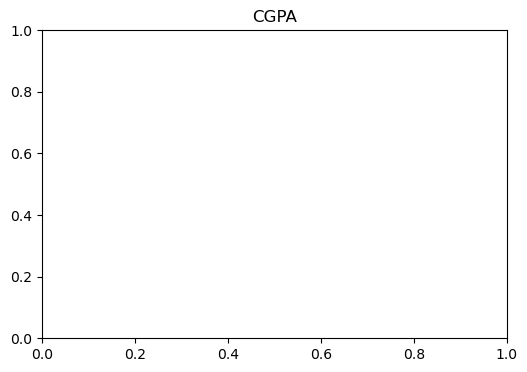

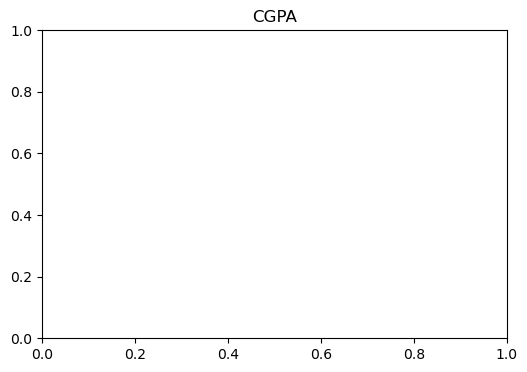

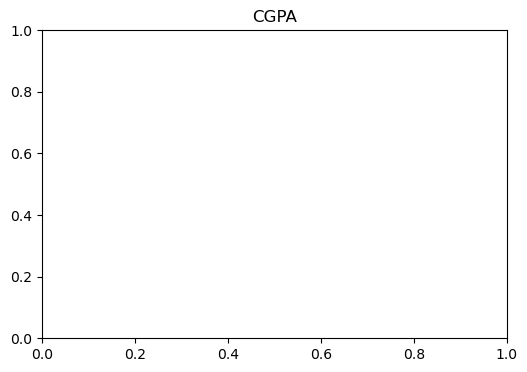

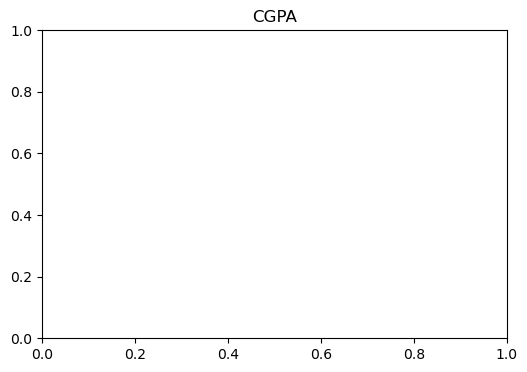

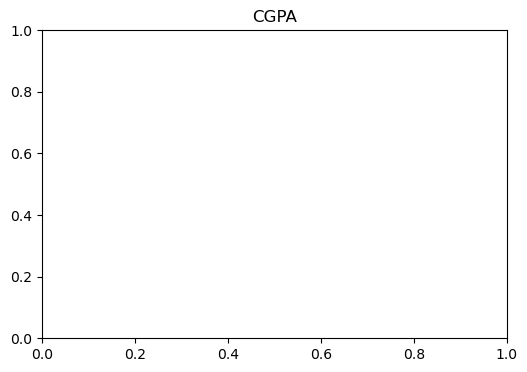

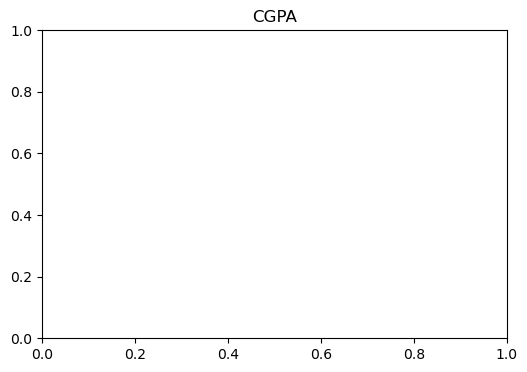

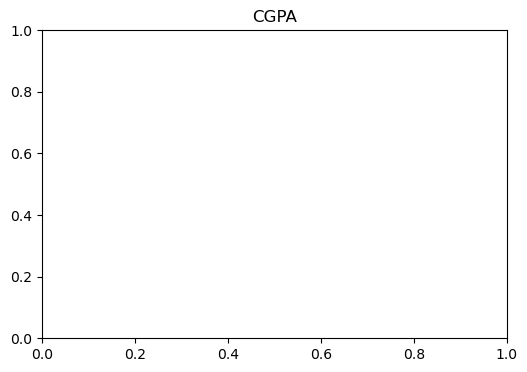

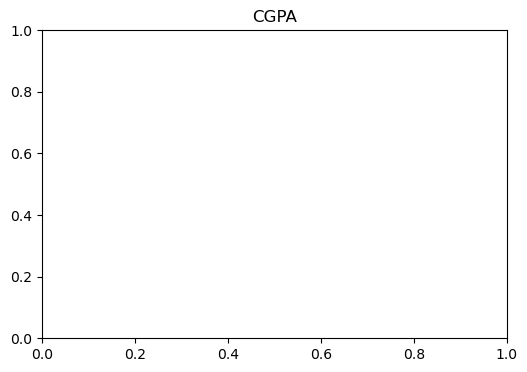

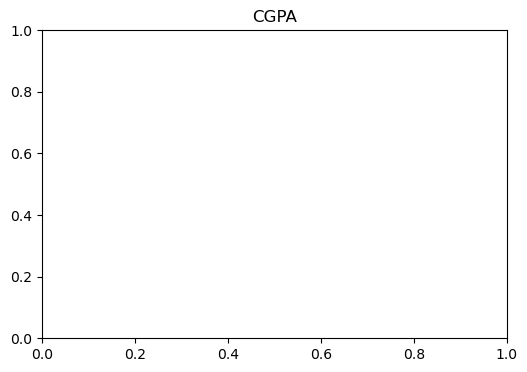

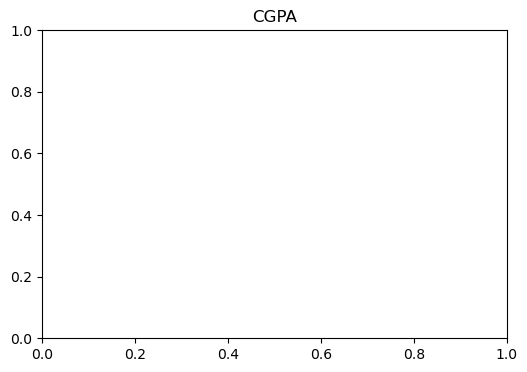

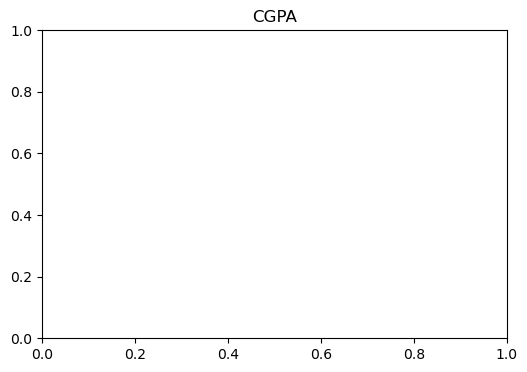

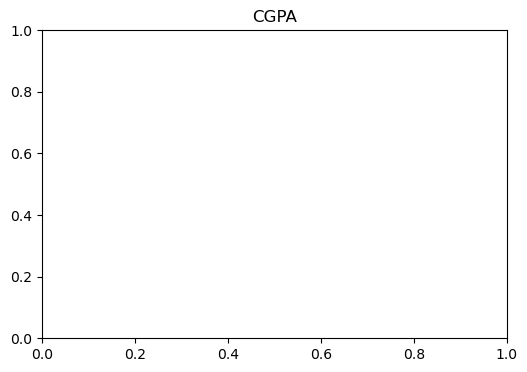

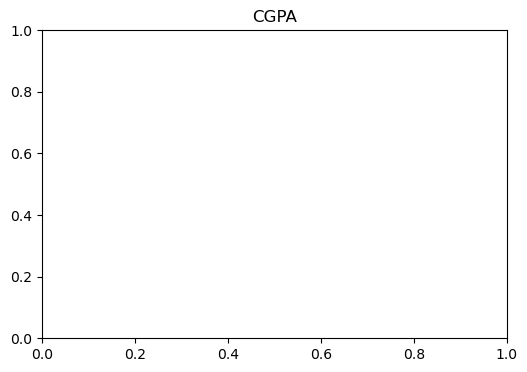

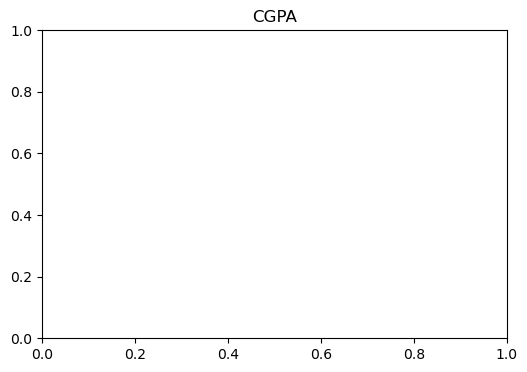

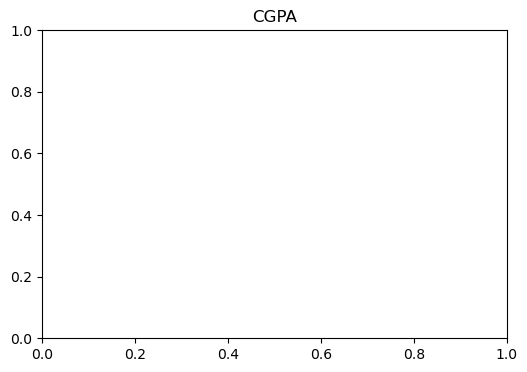

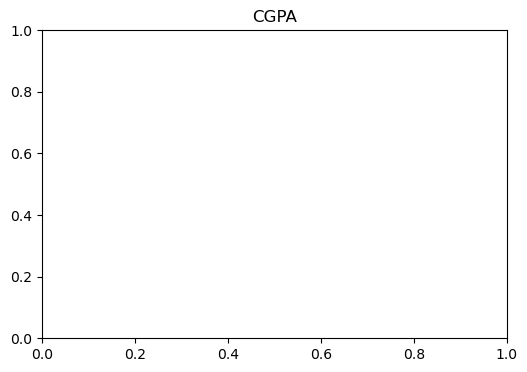

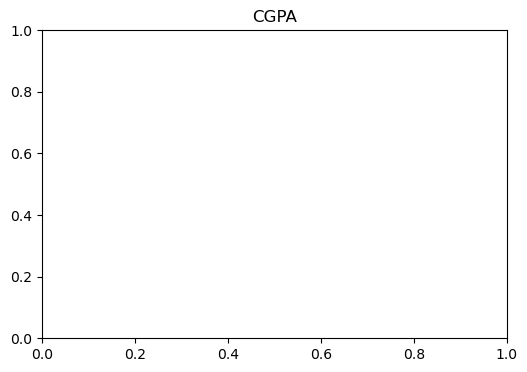

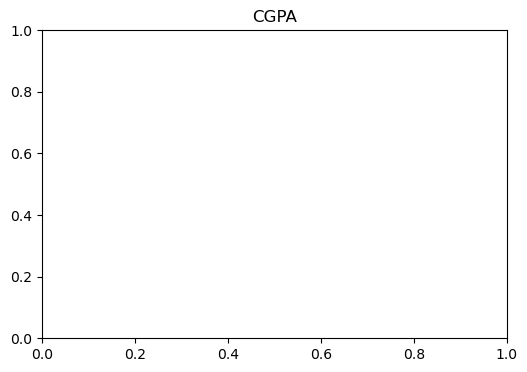

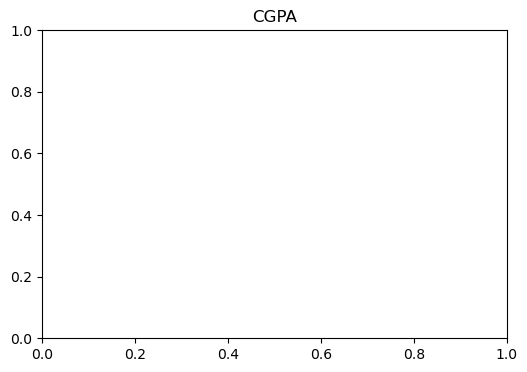

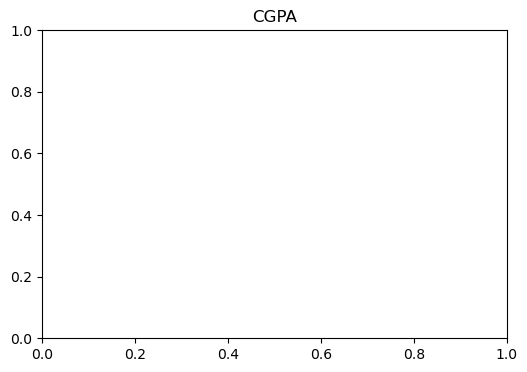

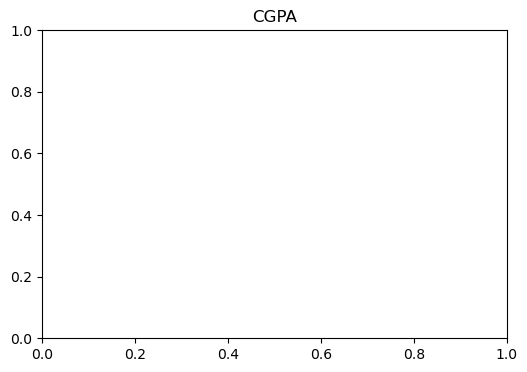

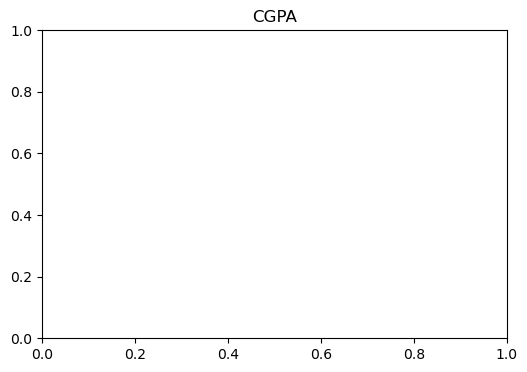

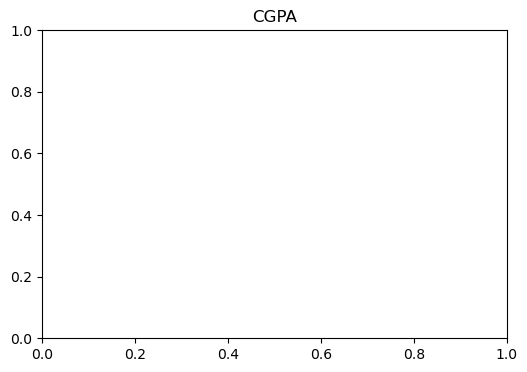

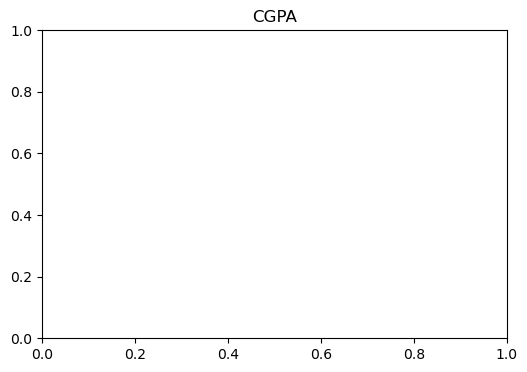

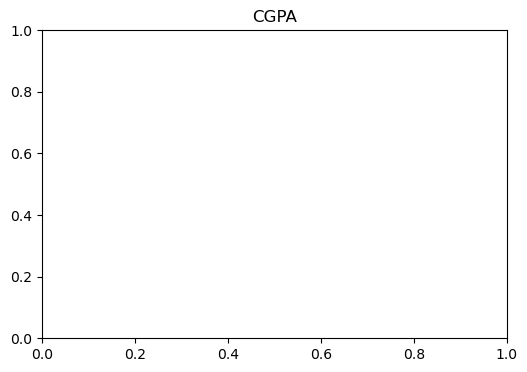

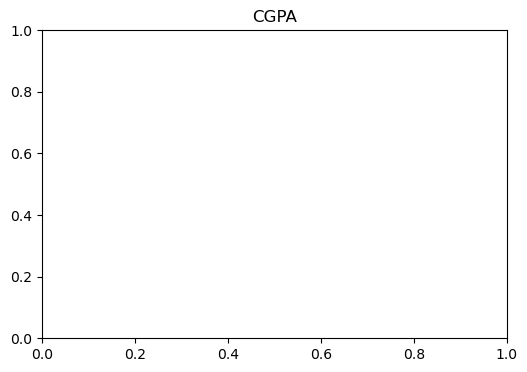

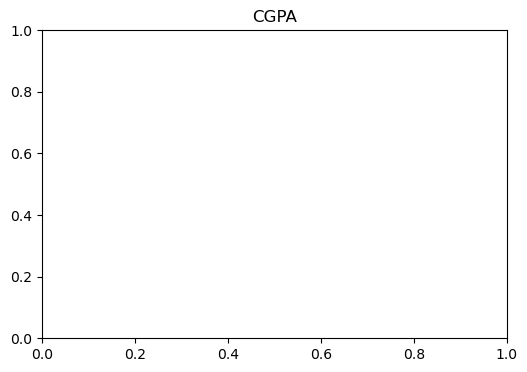

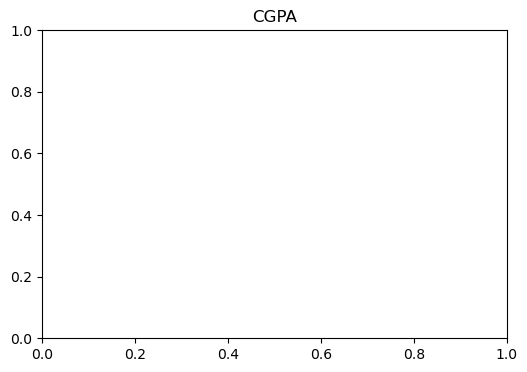

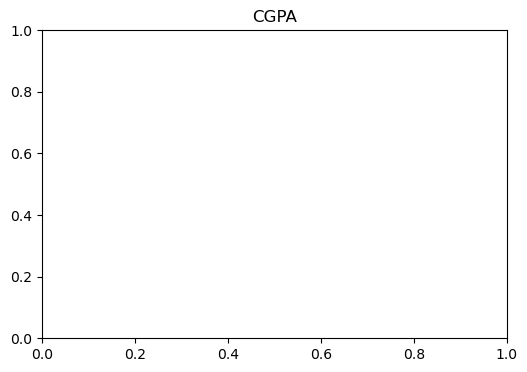

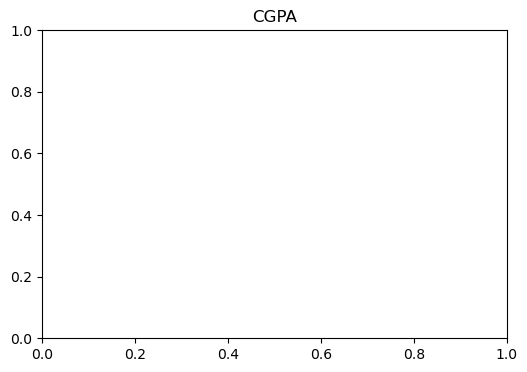

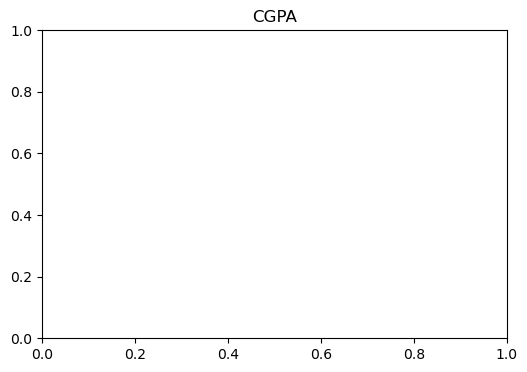

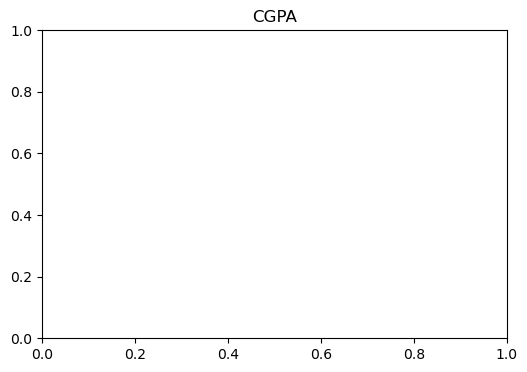

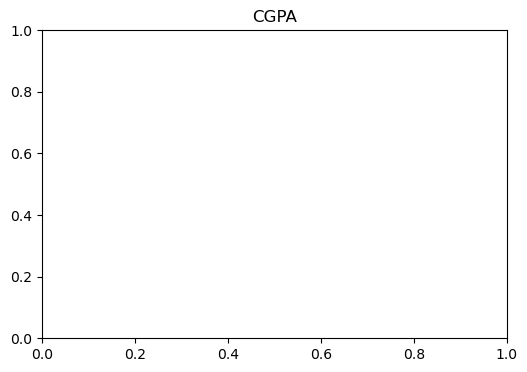

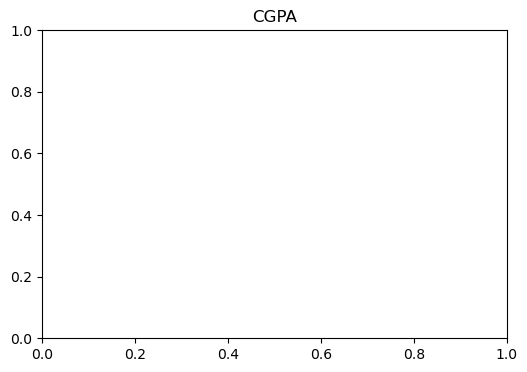

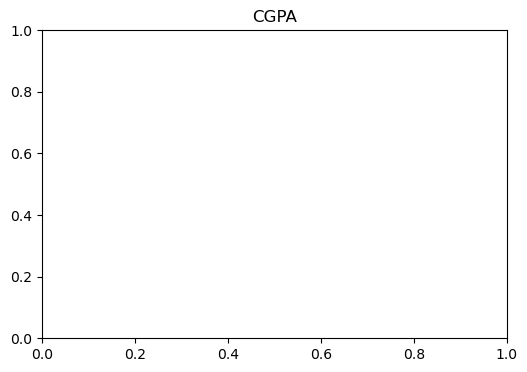

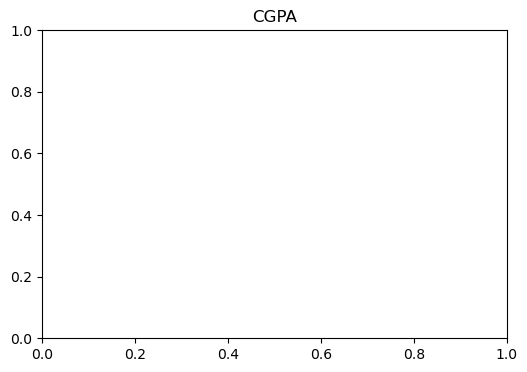

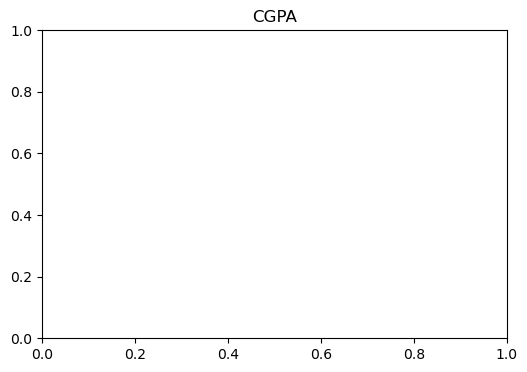

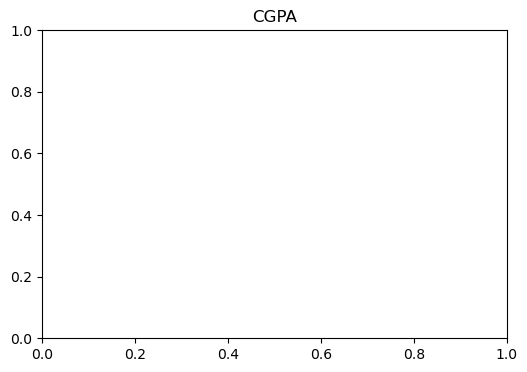

In [60]:
for col in df.drop(['CGPA'],axis=1):
    plt.figure(figsize=(6,4))
    plt.title('CGPA')
    

<Figure size 600x400 with 0 Axes>

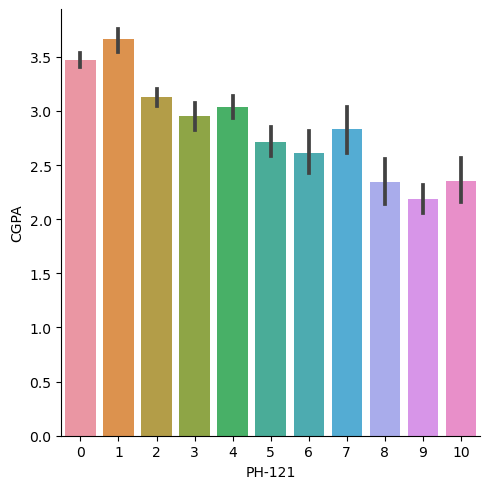

<Figure size 600x400 with 0 Axes>

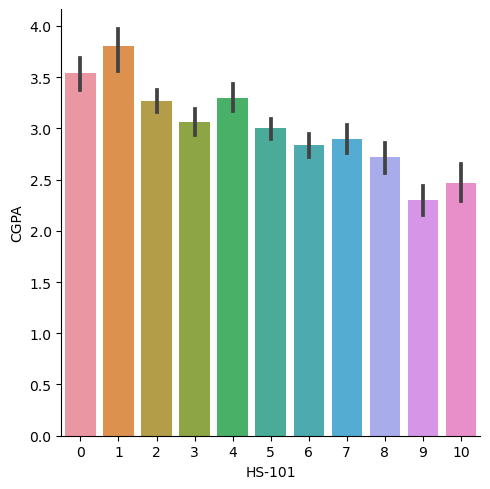

<Figure size 600x400 with 0 Axes>

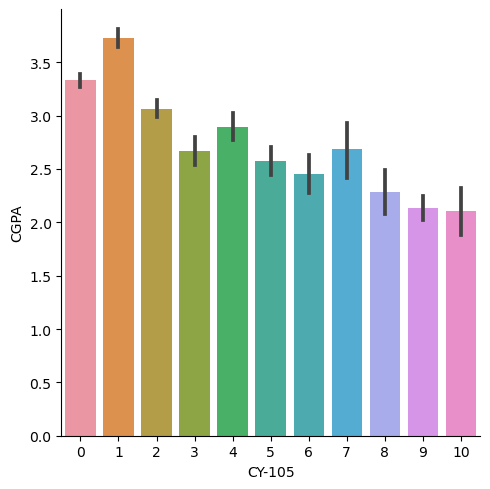

<Figure size 600x400 with 0 Axes>

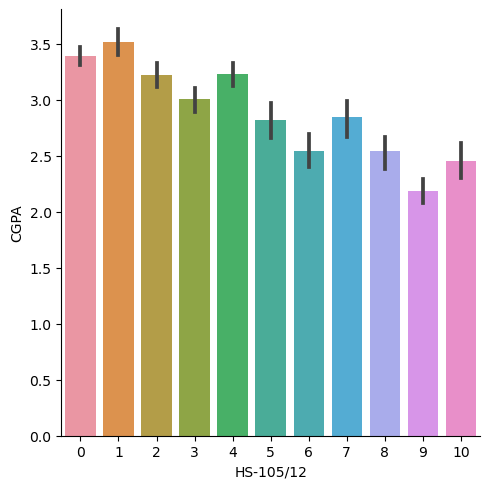

<Figure size 600x400 with 0 Axes>

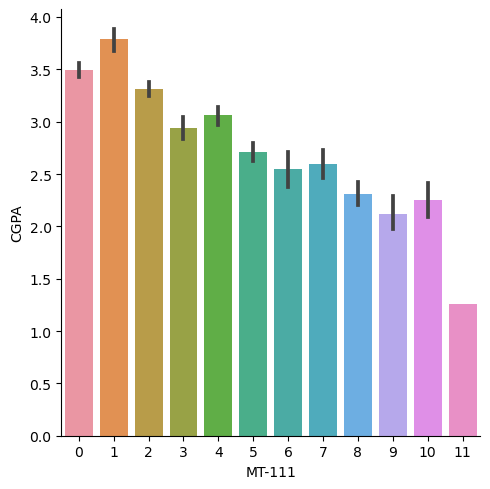

<Figure size 600x400 with 0 Axes>

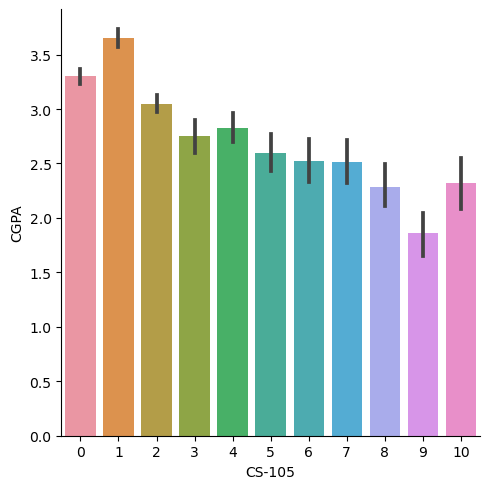

<Figure size 600x400 with 0 Axes>

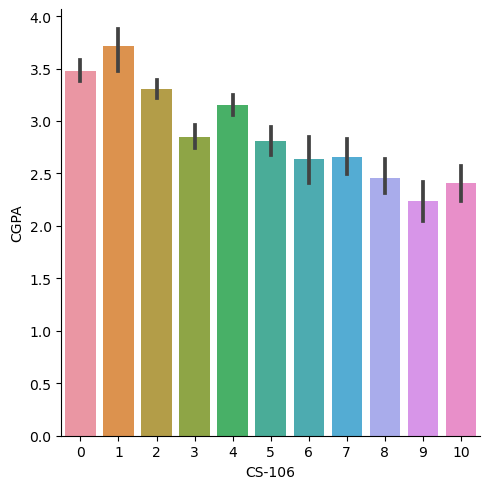

<Figure size 600x400 with 0 Axes>

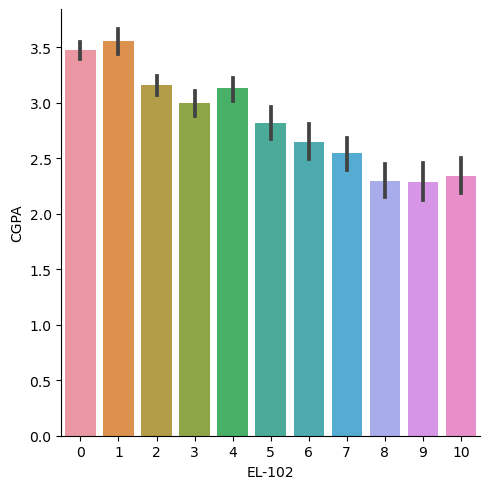

<Figure size 600x400 with 0 Axes>

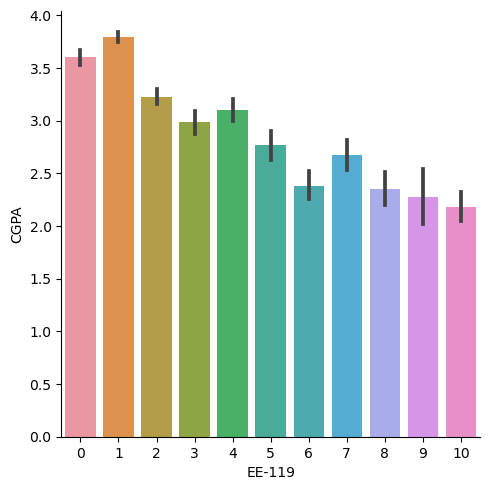

<Figure size 600x400 with 0 Axes>

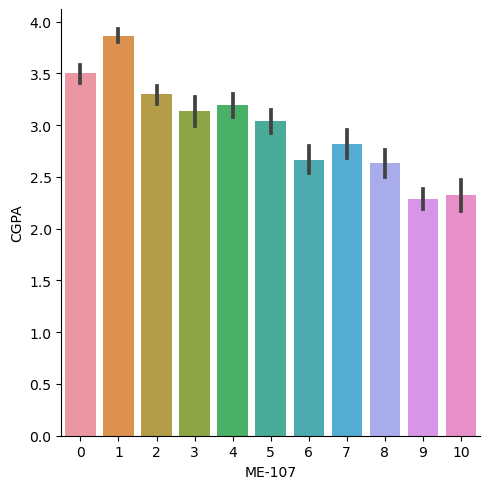

<Figure size 600x400 with 0 Axes>

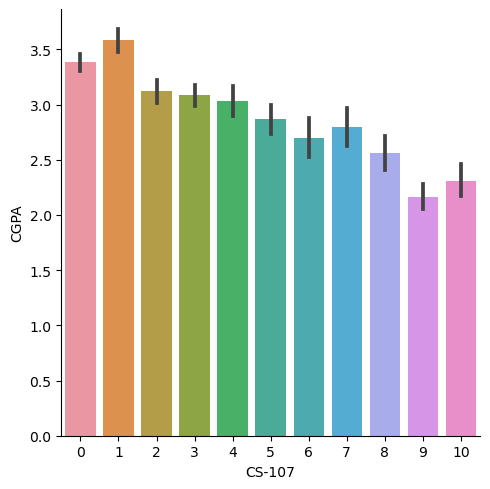

<Figure size 600x400 with 0 Axes>

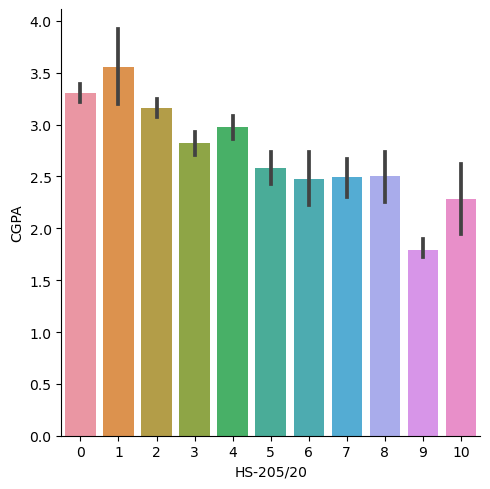

<Figure size 600x400 with 0 Axes>

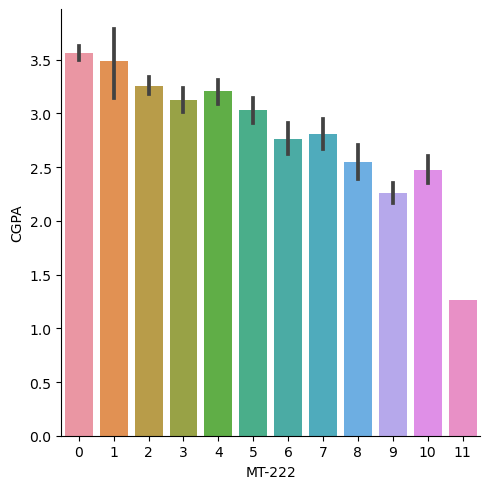

<Figure size 600x400 with 0 Axes>

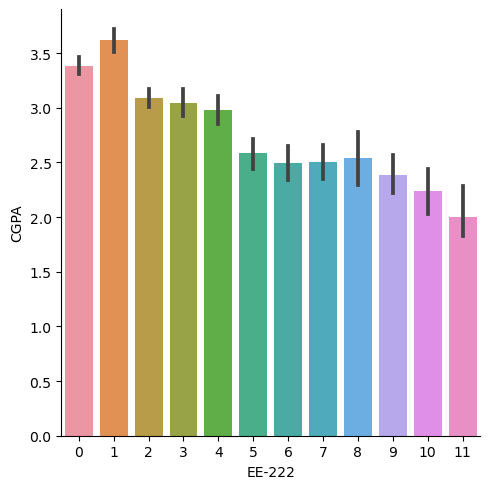

<Figure size 600x400 with 0 Axes>

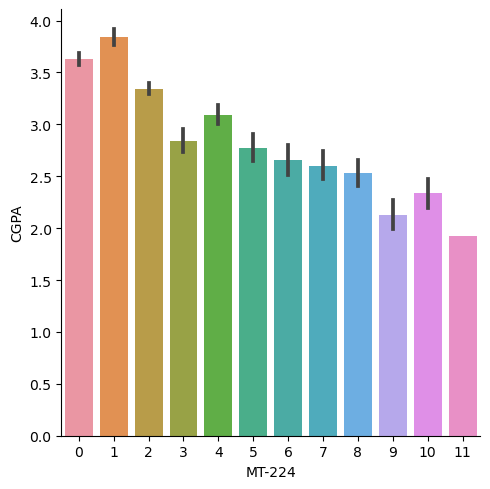

<Figure size 600x400 with 0 Axes>

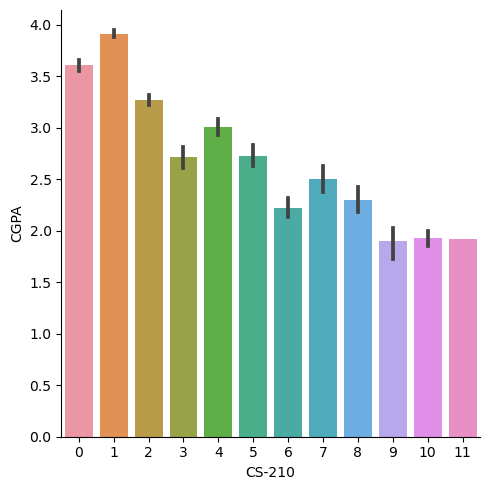

<Figure size 600x400 with 0 Axes>

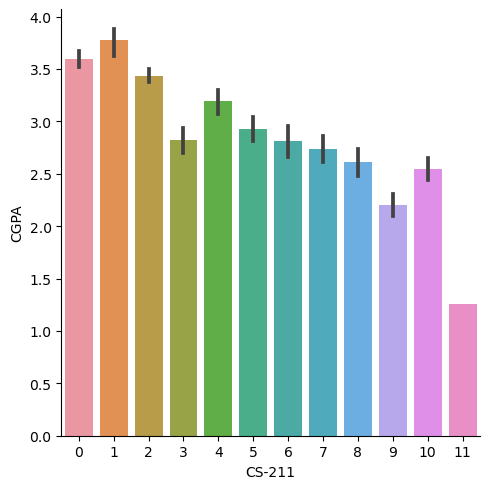

<Figure size 600x400 with 0 Axes>

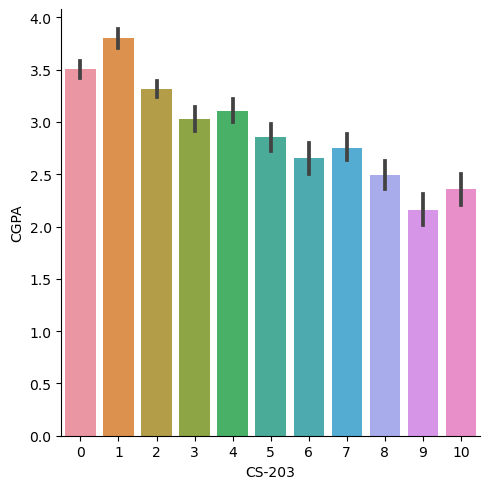

<Figure size 600x400 with 0 Axes>

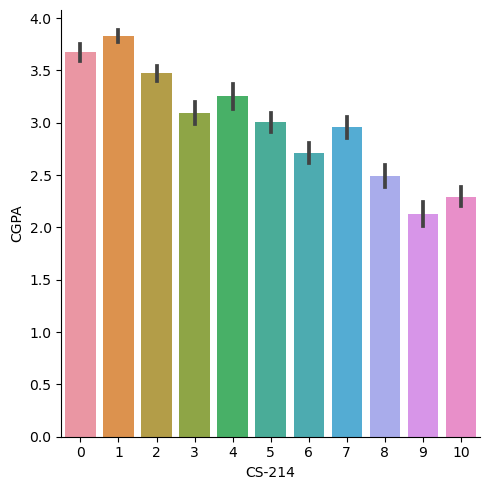

<Figure size 600x400 with 0 Axes>

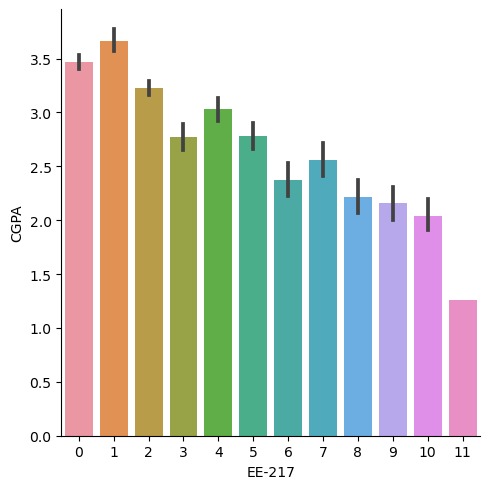

<Figure size 600x400 with 0 Axes>

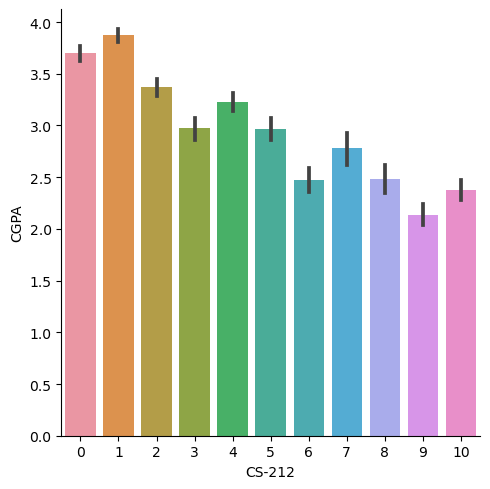

<Figure size 600x400 with 0 Axes>

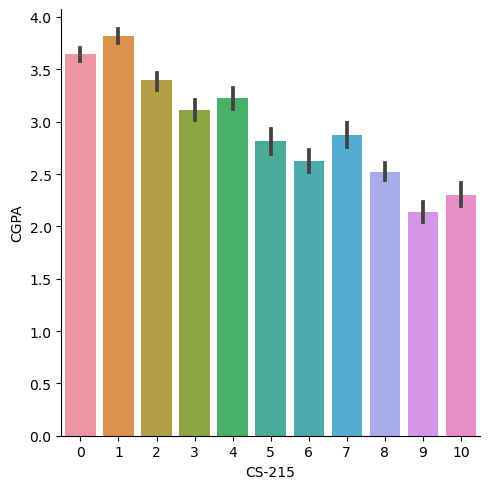

<Figure size 600x400 with 0 Axes>

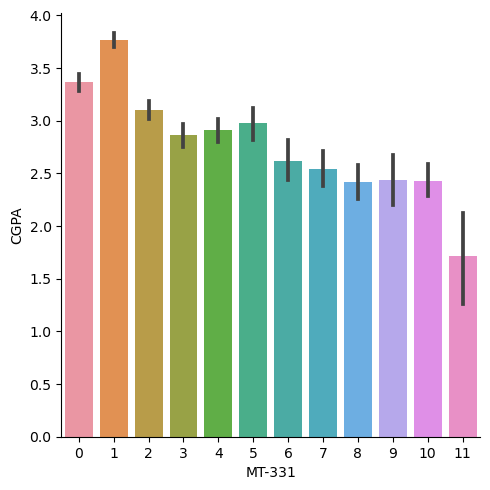

<Figure size 600x400 with 0 Axes>

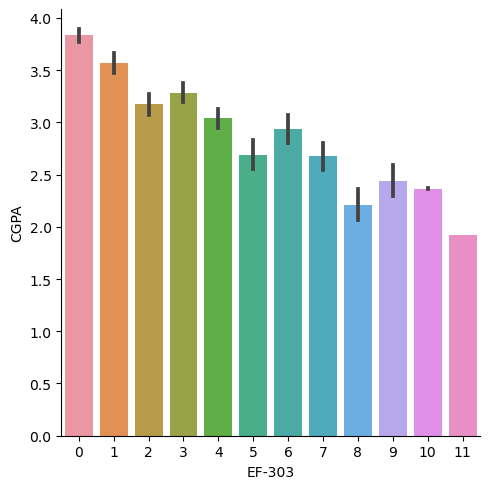

<Figure size 600x400 with 0 Axes>

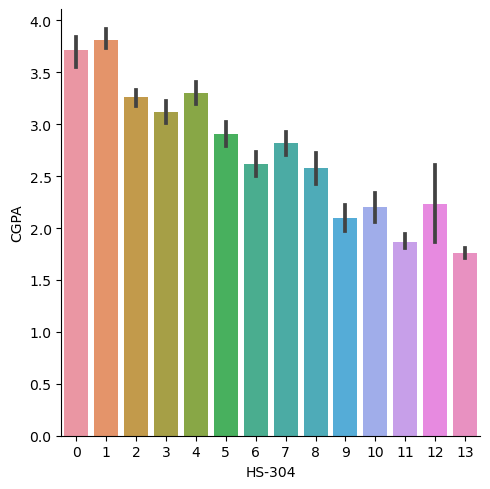

<Figure size 600x400 with 0 Axes>

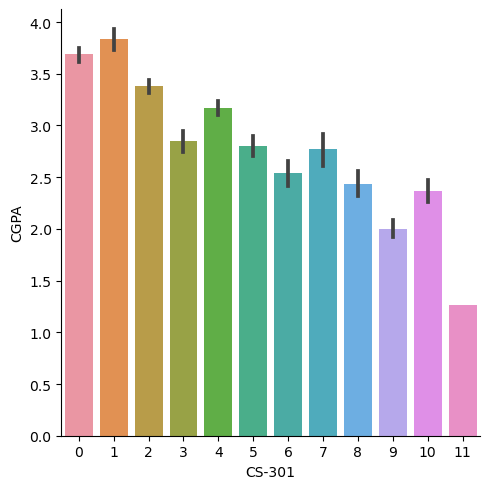

<Figure size 600x400 with 0 Axes>

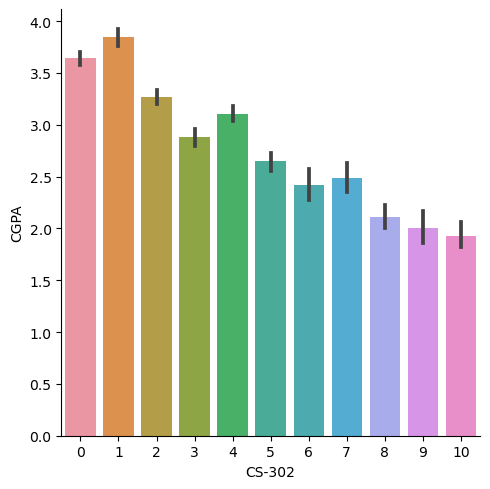

<Figure size 600x400 with 0 Axes>

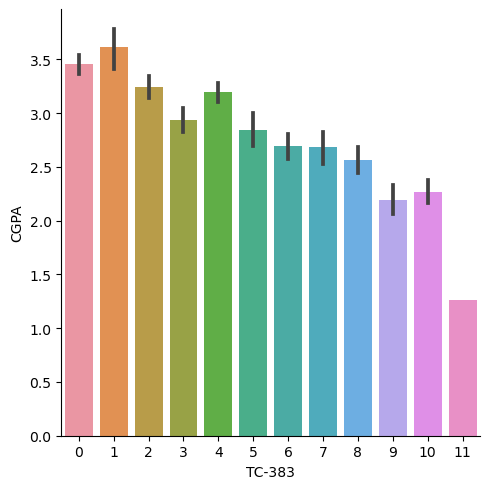

<Figure size 600x400 with 0 Axes>

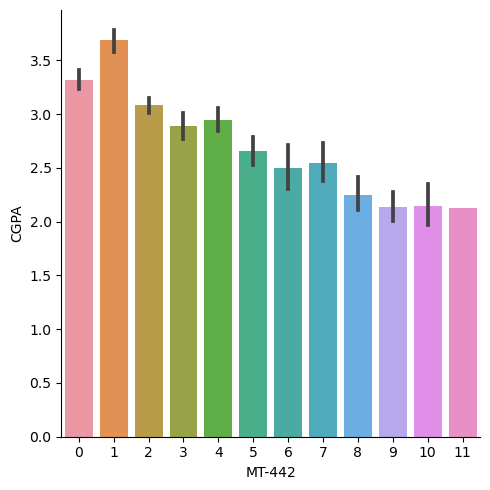

<Figure size 600x400 with 0 Axes>

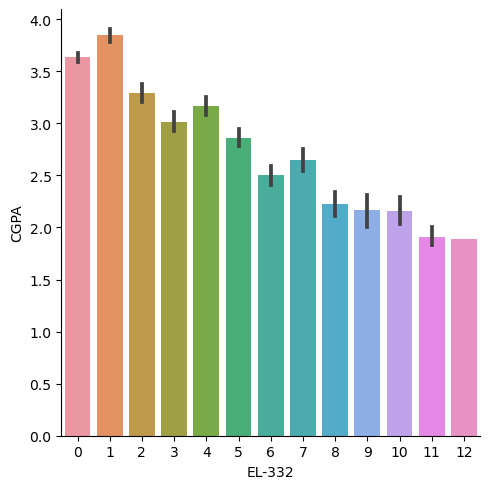

<Figure size 600x400 with 0 Axes>

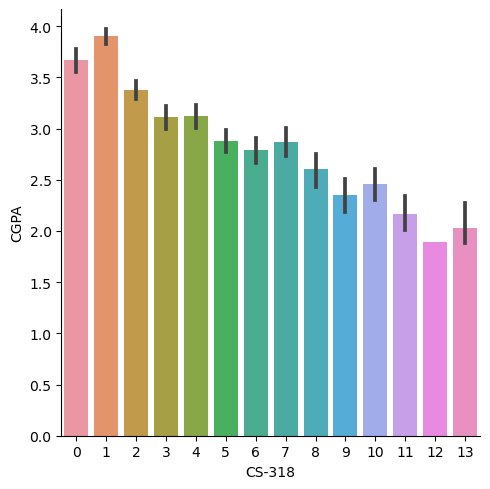

<Figure size 600x400 with 0 Axes>

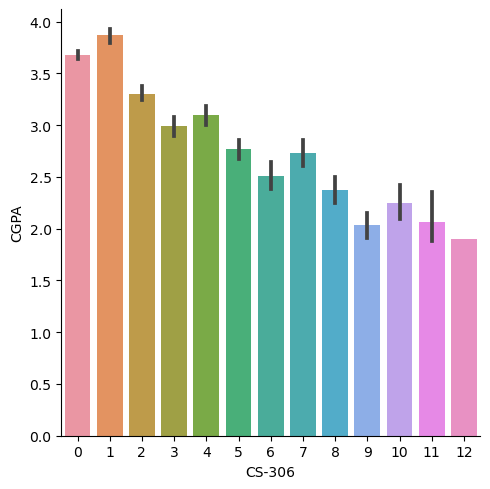

<Figure size 600x400 with 0 Axes>

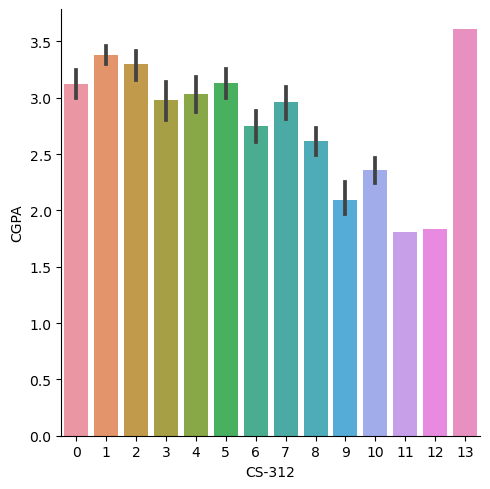

<Figure size 600x400 with 0 Axes>

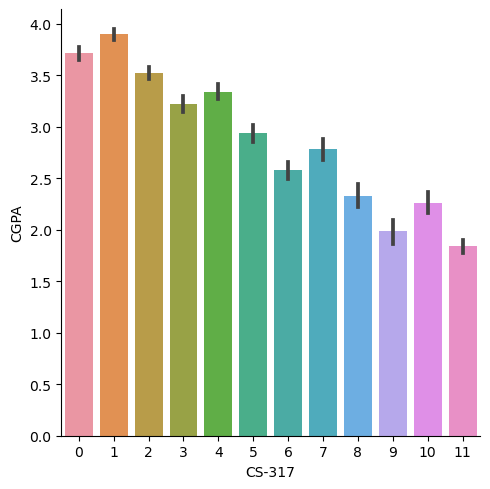

<Figure size 600x400 with 0 Axes>

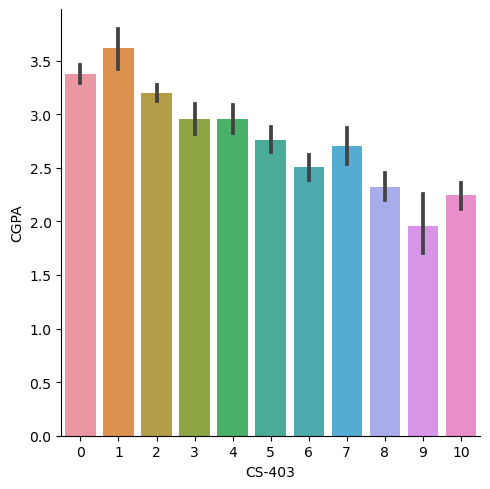

<Figure size 600x400 with 0 Axes>

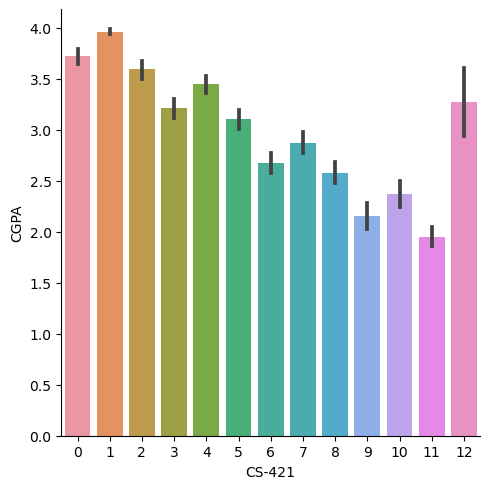

<Figure size 600x400 with 0 Axes>

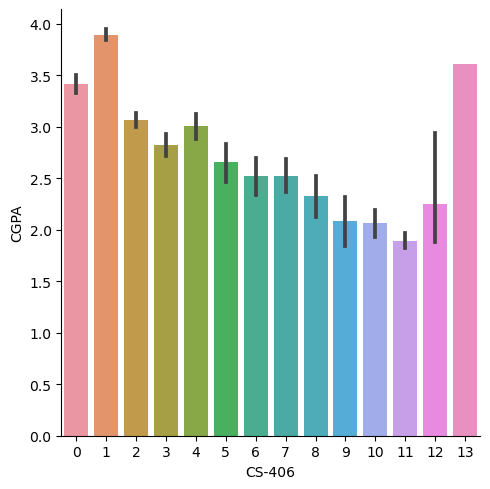

<Figure size 600x400 with 0 Axes>

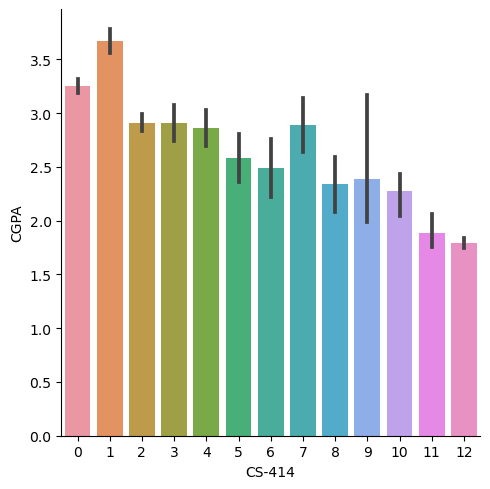

<Figure size 600x400 with 0 Axes>

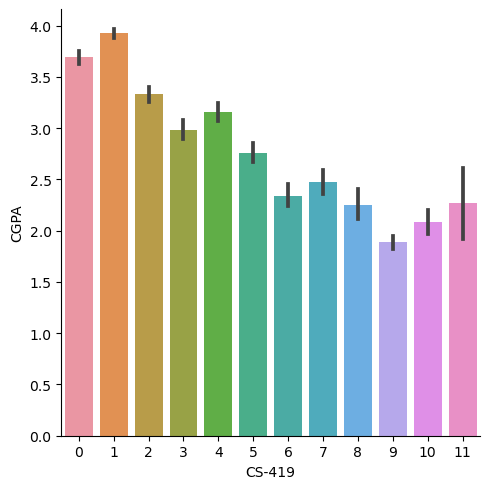

<Figure size 600x400 with 0 Axes>

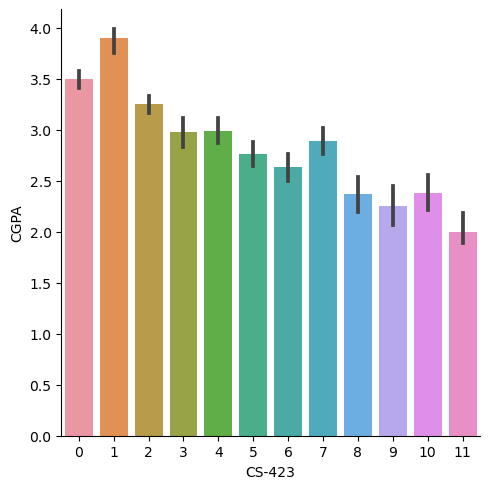

<Figure size 600x400 with 0 Axes>

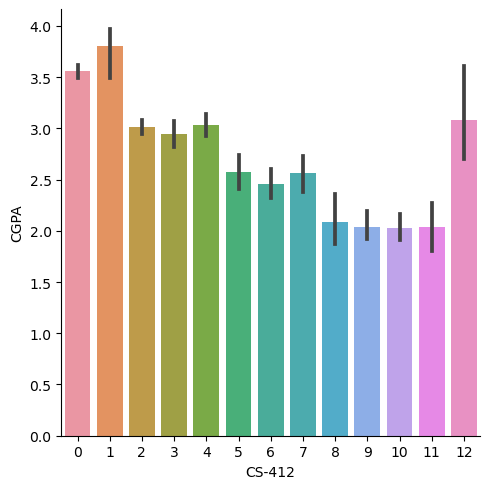

In [61]:
for col in df.drop(['CGPA'],axis=1):
    plt.figure(figsize=(6,4))
    sns.catplot(x=col,y='CGPA',data=df,kind='bar')
    plt.show()

In [62]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.364662,0.542480,0.489461,0.457760,0.590384,0.278479,0.408450,0.580460,0.526575,...,0.065410,0.476340,0.368667,0.327924,0.301207,0.187699,0.503203,0.119664,0.316964,-0.642891
HS-101,0.364662,1.000000,0.318734,0.466245,0.429801,0.383307,0.307744,0.345745,0.303358,0.327945,...,0.228937,0.367613,0.250034,0.321463,0.275355,0.245779,0.301938,0.242951,0.236217,-0.525553
CY-105,0.542480,0.318734,1.000000,0.478800,0.519495,0.568184,0.349782,0.421849,0.484034,0.462803,...,0.298765,0.494913,0.525173,0.403245,0.151716,0.044900,0.484092,0.153844,0.085047,-0.647309
HS-105/12,0.489461,0.466245,0.478800,1.000000,0.475902,0.474835,0.485935,0.341497,0.409673,0.312481,...,0.283881,0.489800,0.486041,0.447928,0.181047,0.167917,0.496238,0.256895,0.166924,-0.614840
MT-111,0.457760,0.429801,0.519495,0.475902,1.000000,0.381212,0.491839,0.543150,0.403776,0.462213,...,0.509412,0.572161,0.455681,0.548722,0.318325,0.256619,0.536780,0.429186,0.287769,-0.744468
CS-105,0.590384,0.383307,0.568184,0.474835,0.381212,1.000000,0.276018,0.345009,0.498891,0.440830,...,0.083275,0.397862,0.319673,0.269655,0.256310,0.153554,0.339665,0.066309,0.198109,-0.583631
CS-106,0.278479,0.307744,0.349782,0.485935,0.491839,0.276018,1.000000,0.316386,0.286380,0.286875,...,0.489331,0.427427,0.470442,0.429159,0.141503,0.132402,0.452287,0.365533,0.200543,-0.541780
EL-102,0.408450,0.345745,0.421849,0.341497,0.543150,0.345009,0.316386,1.000000,0.454893,0.460814,...,0.338204,0.480480,0.348618,0.406521,0.272197,0.277301,0.414231,0.401338,0.286203,-0.652520
EE-119,0.580460,0.303358,0.484034,0.409673,0.403776,0.498891,0.286380,0.454893,1.000000,0.560468,...,0.176641,0.454772,0.372093,0.380161,0.309460,0.232167,0.488164,0.259521,0.333823,-0.650335
ME-107,0.526575,0.327945,0.462803,0.312481,0.462213,0.440830,0.286875,0.460814,0.560468,1.000000,...,0.216019,0.472185,0.362915,0.372211,0.315541,0.176587,0.467242,0.239895,0.309134,-0.661765


<Axes: >

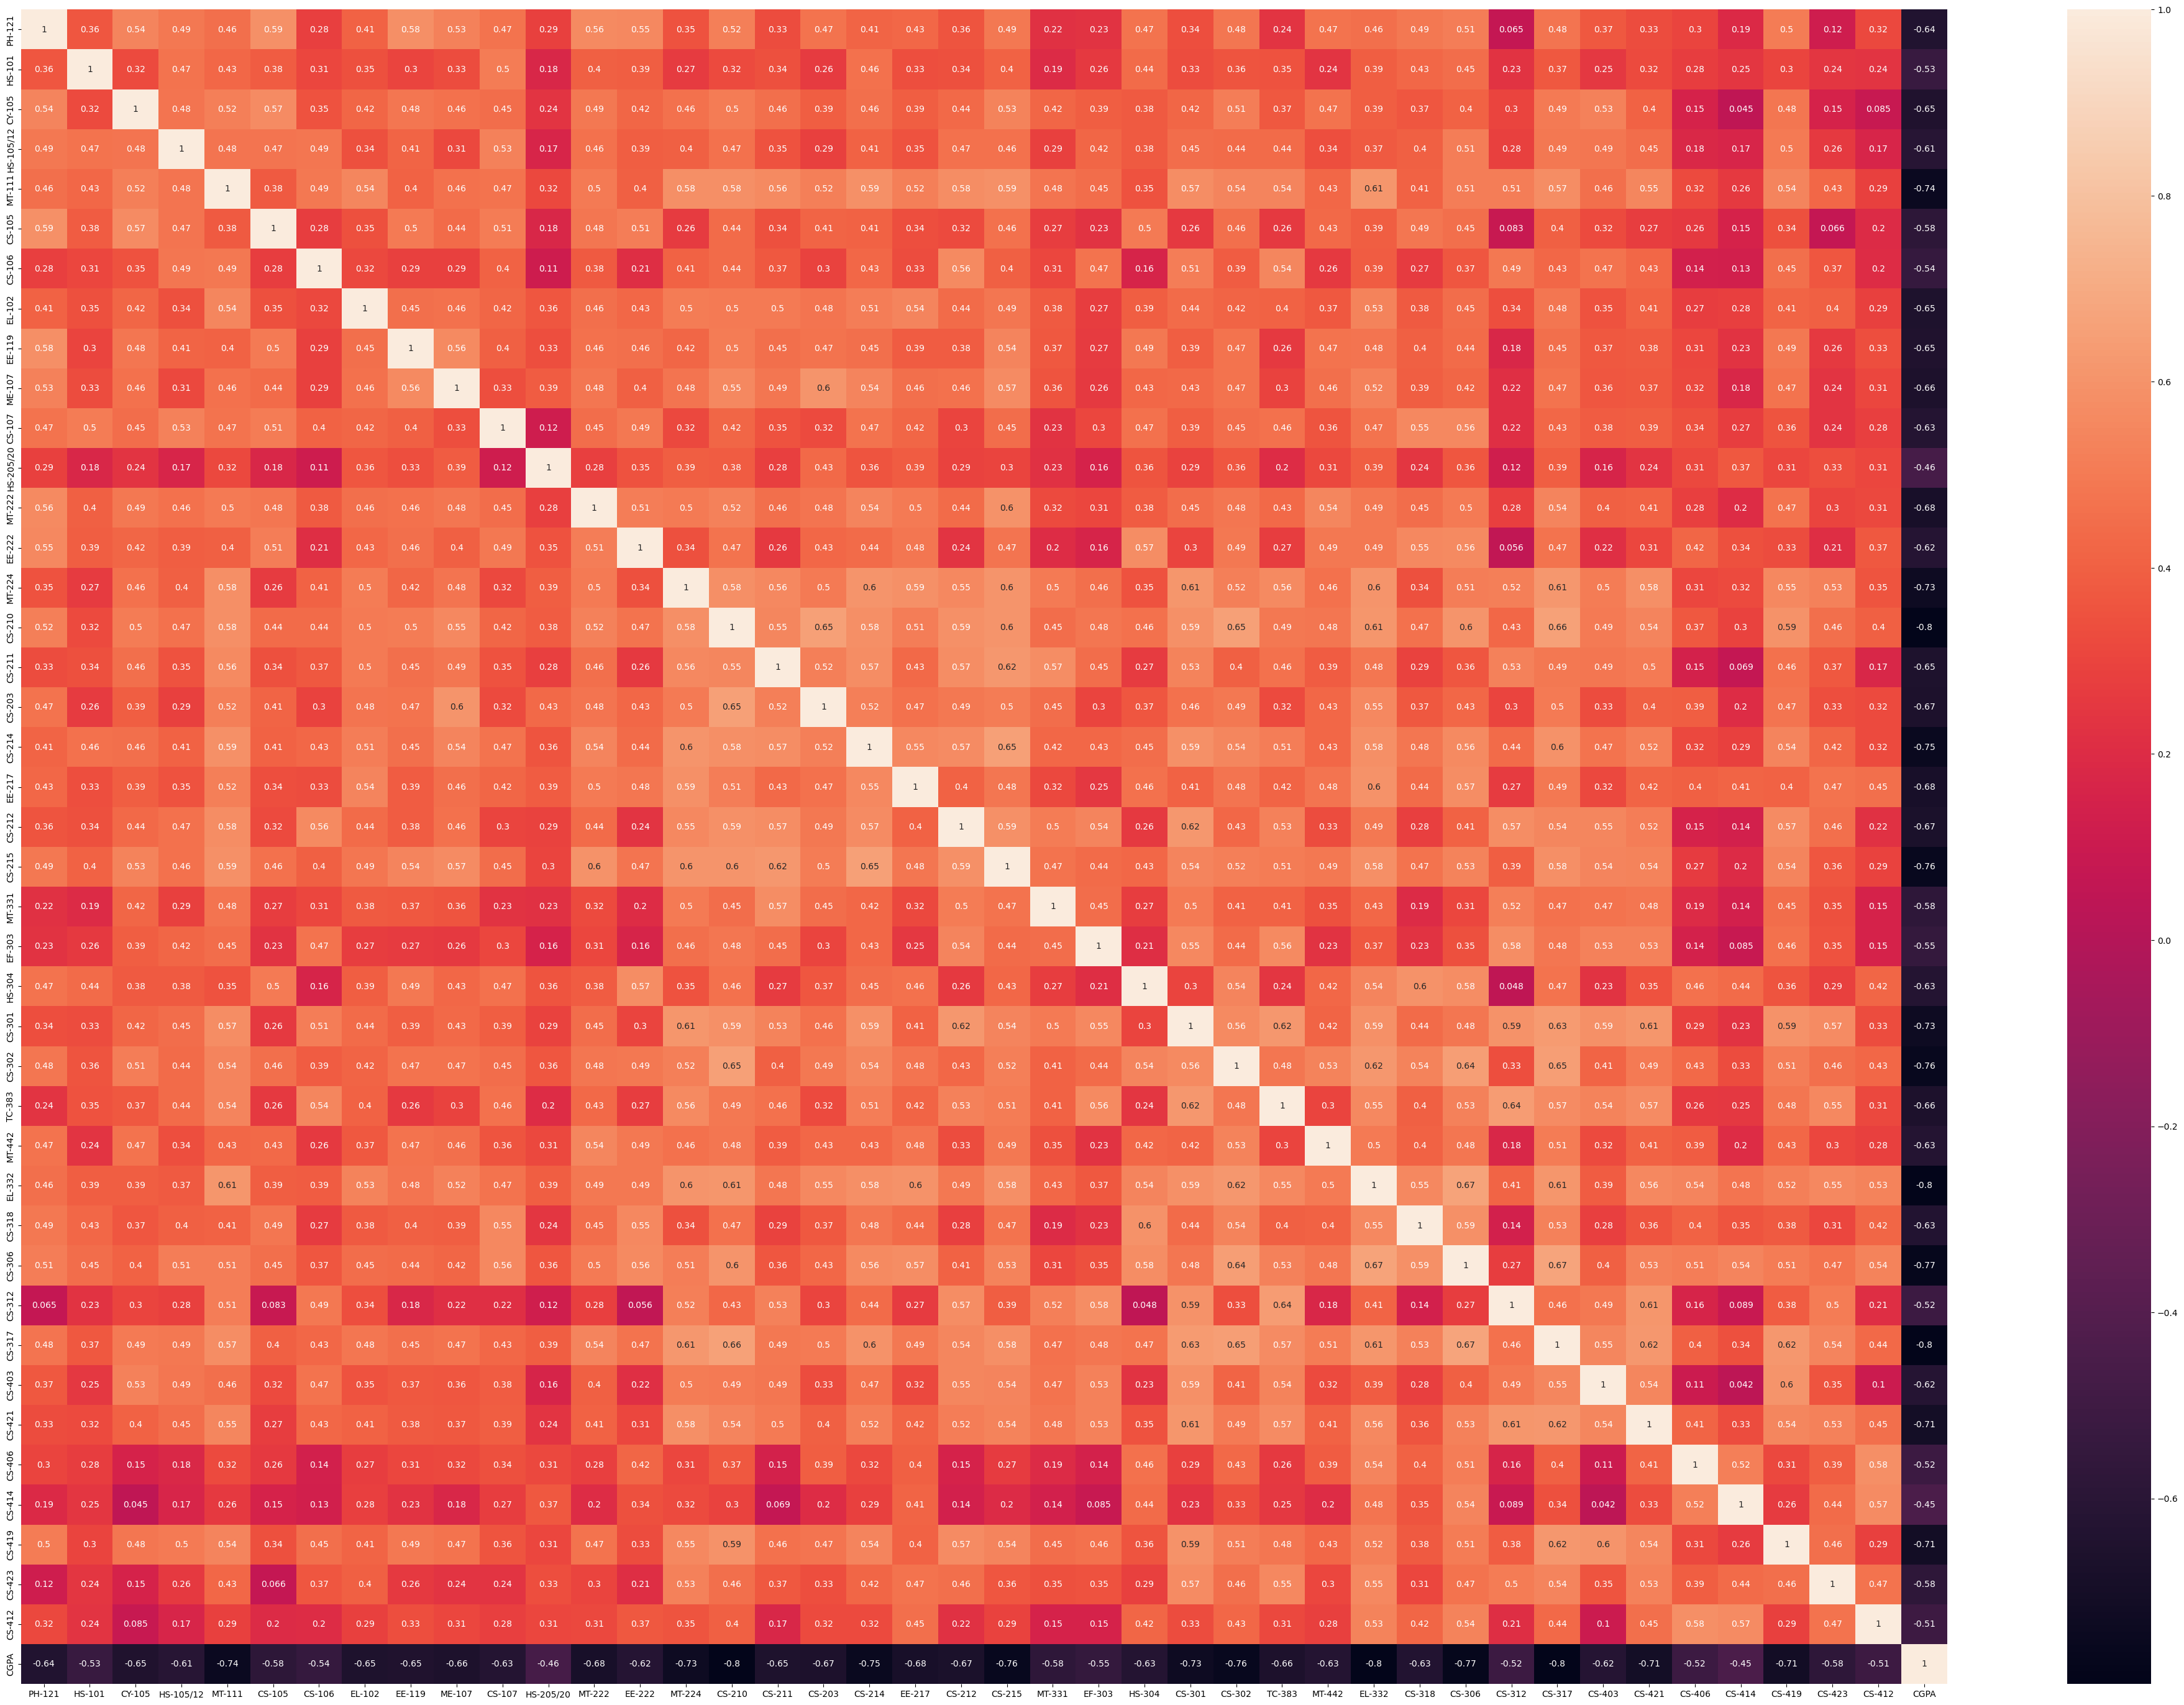

In [63]:
plt.figure(figsize=(50,35))
sns.heatmap(df.corr(),annot=True)

In [64]:
df.drop(['CGPA'],axis=1).corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
PH-121,1.000000,0.364662,0.542480,0.489461,0.457760,0.590384,0.278479,0.408450,0.580460,0.526575,...,0.510454,0.065410,0.476340,0.368667,0.327924,0.301207,0.187699,0.503203,0.119664,0.316964
HS-101,0.364662,1.000000,0.318734,0.466245,0.429801,0.383307,0.307744,0.345745,0.303358,0.327945,...,0.449423,0.228937,0.367613,0.250034,0.321463,0.275355,0.245779,0.301938,0.242951,0.236217
CY-105,0.542480,0.318734,1.000000,0.478800,0.519495,0.568184,0.349782,0.421849,0.484034,0.462803,...,0.403120,0.298765,0.494913,0.525173,0.403245,0.151716,0.044900,0.484092,0.153844,0.085047
HS-105/12,0.489461,0.466245,0.478800,1.000000,0.475902,0.474835,0.485935,0.341497,0.409673,0.312481,...,0.510591,0.283881,0.489800,0.486041,0.447928,0.181047,0.167917,0.496238,0.256895,0.166924
MT-111,0.457760,0.429801,0.519495,0.475902,1.000000,0.381212,0.491839,0.543150,0.403776,0.462213,...,0.508714,0.509412,0.572161,0.455681,0.548722,0.318325,0.256619,0.536780,0.429186,0.287769
CS-105,0.590384,0.383307,0.568184,0.474835,0.381212,1.000000,0.276018,0.345009,0.498891,0.440830,...,0.451801,0.083275,0.397862,0.319673,0.269655,0.256310,0.153554,0.339665,0.066309,0.198109
CS-106,0.278479,0.307744,0.349782,0.485935,0.491839,0.276018,1.000000,0.316386,0.286380,0.286875,...,0.366770,0.489331,0.427427,0.470442,0.429159,0.141503,0.132402,0.452287,0.365533,0.200543
EL-102,0.408450,0.345745,0.421849,0.341497,0.543150,0.345009,0.316386,1.000000,0.454893,0.460814,...,0.446901,0.338204,0.480480,0.348618,0.406521,0.272197,0.277301,0.414231,0.401338,0.286203
EE-119,0.580460,0.303358,0.484034,0.409673,0.403776,0.498891,0.286380,0.454893,1.000000,0.560468,...,0.442248,0.176641,0.454772,0.372093,0.380161,0.309460,0.232167,0.488164,0.259521,0.333823
ME-107,0.526575,0.327945,0.462803,0.312481,0.462213,0.440830,0.286875,0.460814,0.560468,1.000000,...,0.422442,0.216019,0.472185,0.362915,0.372211,0.315541,0.176587,0.467242,0.239895,0.309134


<Axes: >

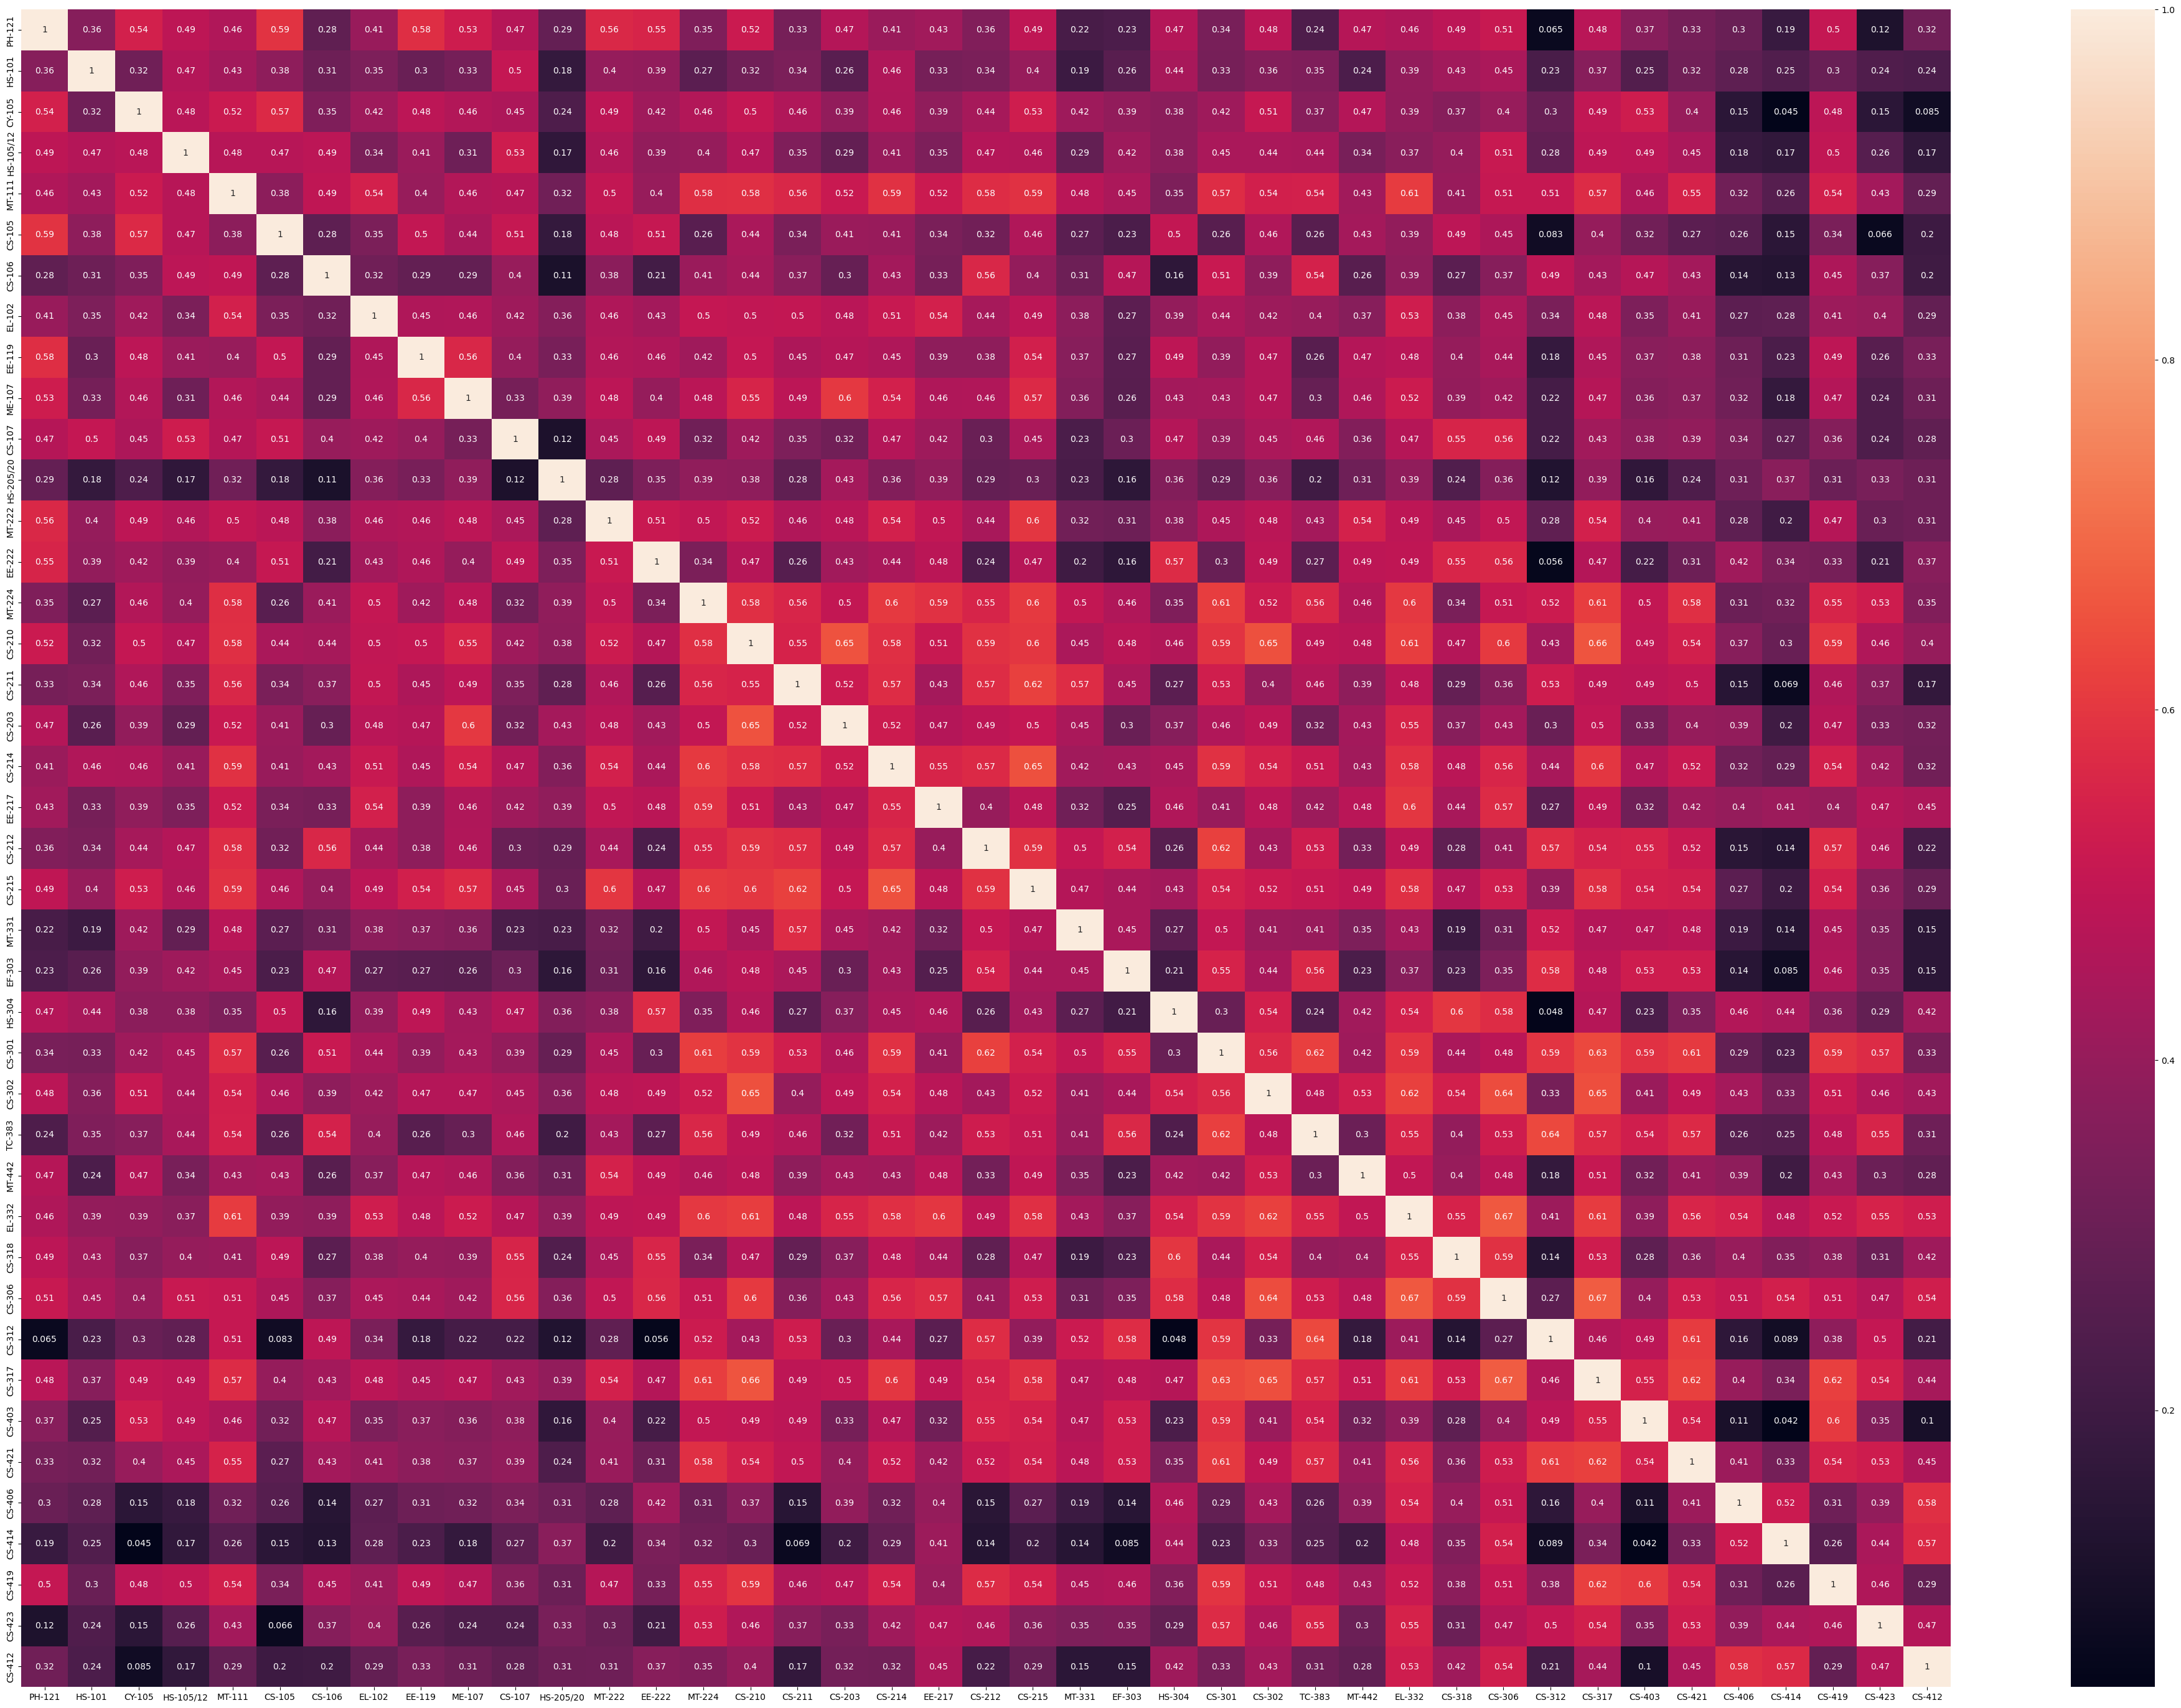

In [65]:
plt.figure(figsize=(50,35))
sns.heatmap(df.drop(['CGPA'],axis=1).corr(),annot=True)

In [66]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,...,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3.691622,5.028520,2.795009,4.176471,3.841355,2.766488,4.069519,3.884135,3.855615,4.723708,...,4.108734,4.832442,3.477718,5.427807,3.001783,2.440285,3.889483,4.001783,3.067736,2.977501
std,2.983182,2.777314,2.840846,3.148562,2.919418,2.639809,2.674045,2.960293,2.622466,3.102469,...,3.356861,2.764652,2.965869,2.734478,2.486750,2.500803,2.390886,2.807833,2.348794,0.594160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.261000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.564000
50%,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.042000
75%,6.000000,7.000000,4.000000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,7.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.458000
max,10.000000,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [67]:
x=df.drop(['CGPA'],axis=1)
y=df['CGPA']

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.43897606,  1.79162927,  1.83383298, ...,  1.72077861,
        -0.35709981, -0.45499486],
       [-1.23858231,  1.43124776,  2.53847703, ...,  0.88352206,
         0.71229339, -0.02886445],
       [-1.23858231, -0.73104127, -0.98474319, ..., -1.62824758,
        -0.71356421, -1.30725569],
       ...,
       [-0.23204729, -1.81218579, -0.28009915, ...,  0.04626551,
        -0.71356421, -0.45499486],
       [-1.23858231, -0.37065977,  2.18615501, ..., -0.37236276,
         0.35582899,  1.24952679],
       [ 0.77448773,  1.43124776,  2.18615501, ...,  0.04626551,
         1.78168659,  2.10178761]])

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [70]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model perform very well')
        print('Random State = ',i)
        print("Training r2_score is = ",r2_score(y_train,pred_train))
        print("Test r2_score is = ",r2_score(y_test,pred_test))
        print('\n')

At random state 4 The model perform very well
Random State =  4
Training r2_score is =  0.9880886688047826
Test r2_score is =  0.987548635053477


At random state 7 The model perform very well
Random State =  7
Training r2_score is =  0.9880267075717799
Test r2_score is =  0.9884458695944689


At random state 8 The model perform very well
Random State =  8
Training r2_score is =  0.9882596748775893
Test r2_score is =  0.9876482227675912


At random state 22 The model perform very well
Random State =  22
Training r2_score is =  0.9878559950221795
Test r2_score is =  0.9884270261054219


At random state 44 The model perform very well
Random State =  44
Training r2_score is =  0.9879994281294348
Test r2_score is =  0.9884085612942367


At random state 57 The model perform very well
Random State =  57
Training r2_score is =  0.9880572552351253
Test r2_score is =  0.9880889949392024


At random state 61 The model perform very well
Random State =  61
Training r2_score is =  0.987596329596611

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=348,test_size=0.25)

In [72]:
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_lr)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lr))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lr))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lr)))

r2_score is =  98.84080311608953
mean_absolute_error =  0.045527351272180175
mean_squared_error =  0.0036605825633282173
root_mean_squared_error =  0.060502748394830934


In [73]:
from sklearn.model_selection import cross_val_score
pred_lr_ac=r2_score(y_test,pred_test_lr)
for i in range(2,15):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_lr_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 96.4004199482534
Accuracy score is = 98.84080311608953


At cv = 3
Cross validation score is = 98.1720313277595
Accuracy score is = 98.84080311608953


At cv = 4
Cross validation score is = 98.14876935050859
Accuracy score is = 98.84080311608953


At cv = 5
Cross validation score is = 98.45947286446608
Accuracy score is = 98.84080311608953


At cv = 6
Cross validation score is = 98.46575505256924
Accuracy score is = 98.84080311608953


At cv = 7
Cross validation score is = 98.45799404138565
Accuracy score is = 98.84080311608953


At cv = 8
Cross validation score is = 98.47801905664768
Accuracy score is = 98.84080311608953


At cv = 9
Cross validation score is = 98.51173543346303
Accuracy score is = 98.84080311608953


At cv = 10
Cross validation score is = 98.5451534902641
Accuracy score is = 98.84080311608953


At cv = 11
Cross validation score is = 98.56602072518993
Accuracy score is = 98.84080311608953


At cv = 12
Cross validation score is = 98

In [74]:
lsscore_selected=cross_val_score(lr,x,y,cv=11)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_lr_ac*100)

Cross validation score = 98.56602072518993 
 r2_score = 98.84080311608953


In [75]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [76]:
gb=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfc=RandomForestRegressor()
svc=SVR()
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [77]:
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_gb)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_gb))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_gb))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_gb)))

r2_score is =  96.07298378604965
mean_absolute_error =  0.08482085304207006
mean_squared_error =  0.012400971119073664
root_mean_squared_error =  0.11135964762459365


In [78]:
pred_gb_ac=r2_score(y_test,pred_test_gb)
for i in range(2,15):
    lsscore=cross_val_score(gb,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_gb_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 92.91652313400853
Accuracy score is = 96.07298378604965


At cv = 3
Cross validation score is = 95.91226896218691
Accuracy score is = 96.07298378604965


At cv = 4
Cross validation score is = 94.93660389495427
Accuracy score is = 96.07298378604965


At cv = 5
Cross validation score is = 96.08385170424226
Accuracy score is = 96.07298378604965


At cv = 6
Cross validation score is = 96.39022705678025
Accuracy score is = 96.07298378604965


At cv = 7
Cross validation score is = 96.0748319382744
Accuracy score is = 96.07298378604965


At cv = 8
Cross validation score is = 96.04970380653198
Accuracy score is = 96.07298378604965


At cv = 9
Cross validation score is = 96.53622536372059
Accuracy score is = 96.07298378604965


At cv = 10
Cross validation score is = 96.48104033091928
Accuracy score is = 96.07298378604965


At cv = 11
Cross validation score is = 96.60441820545942
Accuracy score is = 96.07298378604965


At cv = 12
Cross validation score is = 

In [79]:
lsscore_selected=cross_val_score(gb,x,y,cv=8)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_gb_ac*100)

Cross validation score = 96.08263258212814 
 r2_score = 96.07298378604965


In [80]:
ada.fit(x_train,y_train)
pred_test_ada=ada.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_ada)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_ada))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_ada))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_ada)))

r2_score is =  93.10652562807235
mean_absolute_error =  0.121991728724376
mean_squared_error =  0.02176863347104842
root_mean_squared_error =  0.14754197189629947


In [81]:
pred_ada_ac=r2_score(y_test,pred_test_ada)
for i in range(2,15):
    lsscore=cross_val_score(ada,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_ada_ac*100)
    print('\n')


At cv = 2
Cross validation score is = 90.41853628065662
Accuracy score is = 93.10652562807235


At cv = 3
Cross validation score is = 90.90988511310314
Accuracy score is = 93.10652562807235


At cv = 4
Cross validation score is = 90.07577612654958
Accuracy score is = 93.10652562807235


At cv = 5
Cross validation score is = 92.04382645343881
Accuracy score is = 93.10652562807235


At cv = 6
Cross validation score is = 91.74850540625724
Accuracy score is = 93.10652562807235


At cv = 7
Cross validation score is = 91.4558773037417
Accuracy score is = 93.10652562807235


At cv = 8
Cross validation score is = 91.24702861545686
Accuracy score is = 93.10652562807235


At cv = 9
Cross validation score is = 91.99829856431549
Accuracy score is = 93.10652562807235


At cv = 10
Cross validation score is = 91.85522928835391
Accuracy score is = 93.10652562807235


At cv = 11
Cross validation score is = 92.4385316903777
Accuracy score is = 93.10652562807235


At cv = 12
Cross validation score is = 9

In [82]:
lsscore_selected=cross_val_score(ada,x,y,cv=14)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_ada_ac*100)

Cross validation score = 92.2219667626705 
 r2_score = 93.10652562807235


In [83]:
rfc.fit(x_train,y_train)
pred_test_rfc=rfc.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_rfc)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_rfc))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_rfc))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_rfc)))

r2_score is =  95.56877042284728
mean_absolute_error =  0.09307695035460972
mean_squared_error =  0.013993206804964494
root_mean_squared_error =  0.11829288569041037


In [84]:
pred_rfc_ac=r2_score(y_test,pred_test_rfc)
for i in range(2,15):
    lsscore=cross_val_score(rfc,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_rfc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 92.40936542044244
Accuracy score is = 95.56877042284728


At cv = 3
Cross validation score is = 93.37874379714796
Accuracy score is = 95.56877042284728


At cv = 4
Cross validation score is = 92.77056385078092
Accuracy score is = 95.56877042284728


At cv = 5
Cross validation score is = 94.71831282658665
Accuracy score is = 95.56877042284728


At cv = 6
Cross validation score is = 94.60182642323772
Accuracy score is = 95.56877042284728


At cv = 7
Cross validation score is = 94.49301545220435
Accuracy score is = 95.56877042284728


At cv = 8
Cross validation score is = 94.1780075474993
Accuracy score is = 95.56877042284728


At cv = 9
Cross validation score is = 94.56185032891085
Accuracy score is = 95.56877042284728


At cv = 10
Cross validation score is = 94.56417927219583
Accuracy score is = 95.56877042284728


At cv = 11
Cross validation score is = 94.83990160340934
Accuracy score is = 95.56877042284728


At cv = 12
Cross validation score is = 

In [85]:
lsscore_selected=cross_val_score(rfc,x,y,cv=14)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_rfc_ac*100)

Cross validation score = 94.93426458321811 
 r2_score = 95.56877042284728


In [86]:
svc.fit(x_train,y_train)
pred_test_svc=svc.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_svc)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_svc))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_svc))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_svc)))

r2_score is =  95.72381215265717
mean_absolute_error =  0.07514614841483142
mean_squared_error =  0.013503606582079357
root_mean_squared_error =  0.11620501960792984


In [87]:
pred_svc_ac=r2_score(y_test,pred_test_svc)
for i in range(2,15):
    lsscore=cross_val_score(svc,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_svc_ac*100)
    print('\n')


At cv = 2
Cross validation score is = 92.28466618825199
Accuracy score is = 95.72381215265717


At cv = 3
Cross validation score is = 94.40014676658612
Accuracy score is = 95.72381215265717


At cv = 4
Cross validation score is = 94.15049889152397
Accuracy score is = 95.72381215265717


At cv = 5
Cross validation score is = 95.6862131634741
Accuracy score is = 95.72381215265717


At cv = 6
Cross validation score is = 95.94748056455416
Accuracy score is = 95.72381215265717


At cv = 7
Cross validation score is = 96.01578705181868
Accuracy score is = 95.72381215265717


At cv = 8
Cross validation score is = 96.12589601415547
Accuracy score is = 95.72381215265717


At cv = 9
Cross validation score is = 96.26734641948337
Accuracy score is = 95.72381215265717


At cv = 10
Cross validation score is = 96.2544709993988
Accuracy score is = 95.72381215265717


At cv = 11
Cross validation score is = 96.45667156837943
Accuracy score is = 95.72381215265717


At cv = 12
Cross validation score is = 9

In [88]:
lsscore_selected=cross_val_score(svc,x,y,cv=5)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_svc_ac*100)

Cross validation score = 95.6862131634741 
 r2_score = 95.72381215265717


In [89]:
dtc.fit(x_train,y_train)
pred_test_dtc=dtc.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_dtc)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_dtc))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_dtc))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_dtc)))

r2_score is =  83.17049353421436
mean_absolute_error =  0.17637588652482272
mean_squared_error =  0.053145241134751775
root_mean_squared_error =  0.23053251643694816


In [90]:
pred_dtc_ac=r2_score(y_test,pred_test_dtc)
for i in range(2,15):
    lsscore=cross_val_score(dtc,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_dtc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 61.305083778729916
Accuracy score is = 83.17049353421436


At cv = 3
Cross validation score is = 79.45448282997799
Accuracy score is = 83.17049353421436


At cv = 4
Cross validation score is = 72.4060776823906
Accuracy score is = 83.17049353421436


At cv = 5
Cross validation score is = 80.3283631620681
Accuracy score is = 83.17049353421436


At cv = 6
Cross validation score is = 80.86839021338221
Accuracy score is = 83.17049353421436


At cv = 7
Cross validation score is = 79.27999908120856
Accuracy score is = 83.17049353421436


At cv = 8
Cross validation score is = 81.37114776811872
Accuracy score is = 83.17049353421436


At cv = 9
Cross validation score is = 82.47318398116418
Accuracy score is = 83.17049353421436


At cv = 10
Cross validation score is = 82.71728945002674
Accuracy score is = 83.17049353421436


At cv = 11
Cross validation score is = 83.1793709027729
Accuracy score is = 83.17049353421436


At cv = 12
Cross validation score is = 8

In [91]:
lsscore_selected=cross_val_score(dtc,x,y,cv=5)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_dtc_ac*100)

Cross validation score = 81.35317258452226 
 r2_score = 83.17049353421436


In [92]:
knn.fit(x_train,y_train)
pred_test_knn=knn.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_knn)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_knn))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_knn))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_knn)))

r2_score is =  95.80668054699328
mean_absolute_error =  0.08756737588652481
mean_squared_error =  0.013241919716312054
root_mean_squared_error =  0.11507354047004921


In [93]:
pred_knn_ac=r2_score(y_test,pred_test_knn)
for i in range(2,15):
    lsscore=cross_val_score(knn,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_knn_ac*100)
    print('\n')


At cv = 2
Cross validation score is = 93.8658645155117
Accuracy score is = 95.80668054699328


At cv = 3
Cross validation score is = 95.33683324301187
Accuracy score is = 95.80668054699328


At cv = 4
Cross validation score is = 94.7979456598048
Accuracy score is = 95.80668054699328


At cv = 5
Cross validation score is = 95.75099108998597
Accuracy score is = 95.80668054699328


At cv = 6
Cross validation score is = 95.865765972429
Accuracy score is = 95.80668054699328


At cv = 7
Cross validation score is = 95.66429589744907
Accuracy score is = 95.80668054699328


At cv = 8
Cross validation score is = 95.85972510419968
Accuracy score is = 95.80668054699328


At cv = 9
Cross validation score is = 96.03626046604445
Accuracy score is = 95.80668054699328


At cv = 10
Cross validation score is = 95.96591043493615
Accuracy score is = 95.80668054699328


At cv = 11
Cross validation score is = 96.20226238413477
Accuracy score is = 95.80668054699328


At cv = 12
Cross validation score is = 95.

In [94]:
lsscore_selected=cross_val_score(knn,x,y,cv=12)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_knn_ac*100)

Cross validation score = 95.81936985804825 
 r2_score = 95.80668054699328


In [95]:
grid_paramlr={
    
    'fit_intercept':[True,False],
    'copy_X' : [True,False],
    'positive' :[True,False]
}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
gd_lr=GridSearchCV(estimator=lr,n_jobs=-1,
                  param_grid=grid_paramlr,
                  scoring='accuracy',
                  cv=11)

In [98]:
gd_lr.fit(x,y)

GridSearchCV(cv=11, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='accuracy')

In [99]:
best_parameters=gd_lr.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'positive': True}


In [100]:
lrh=LinearRegression(copy_X=True,fit_intercept=True)

In [101]:
lrh.fit(x_train,y_train)
pred_test_lrh=lrh.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_lrh)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lrh))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lrh))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lrh)))

r2_score is =  98.84080311608953
mean_absolute_error =  0.045527351272180175
mean_squared_error =  0.0036605825633282173
root_mean_squared_error =  0.060502748394830934


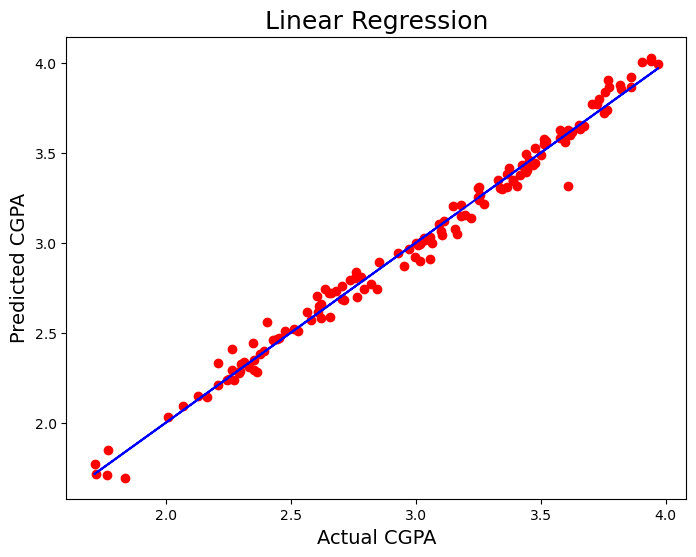

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_lrh,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual CGPA',fontsize=14)
plt.ylabel('Predicted CGPA',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lrh.png')
plt.show()

In [103]:
x.shape

(561, 41)

In [104]:
y.shape

(561,)

In [105]:
from sklearn.decomposition import PCA

In [106]:
mz=[10,20,30,35,33]
for i in mz:
    pca = PCA(i)
    x_pca = pca.fit_transform(x)
    x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=348)
    lr.fit(x_train_pca,y_train)
    pred_test_lrp=lr.predict(x_test_pca)
    print('n_components =',i)
    print("r2_score is = ",r2_score(y_test,pred_test_lrp)*100)
    print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lrp))
    print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lrp))
    print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lrp)),'\n')

n_components = 10
r2_score is =  98.807792920038
mean_absolute_error =  0.04506344488911782
mean_squared_error =  0.00376482417211404
root_mean_squared_error =  0.061358163043836636 

n_components = 20
r2_score is =  98.81224770597137
mean_absolute_error =  0.046423647309888925
mean_squared_error =  0.0037507565776117987
root_mean_squared_error =  0.061243420688362915 

n_components = 30
r2_score is =  98.90872738678098
mean_absolute_error =  0.04495095547835168
mean_squared_error =  0.0034460871619248832
root_mean_squared_error =  0.058703382883142974 

n_components = 35
r2_score is =  98.85615626084065
mean_absolute_error =  0.04577431165350972
mean_squared_error =  0.003612099467187943
root_mean_squared_error =  0.060100744314758224 

n_components = 33
r2_score is =  98.86157045663163
mean_absolute_error =  0.045664663133275184
mean_squared_error =  0.0035950021897694097
root_mean_squared_error =  0.0599583371164462 



In [107]:
pca = PCA(n_components=30)
x_pca = pca.fit_transform(x)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=348)

In [108]:
lrp=LinearRegression()
gbp=GradientBoostingRegressor()
adap=AdaBoostRegressor()
rfcp=RandomForestRegressor()
svcp=SVR()
dtcp=DecisionTreeRegressor()
knnp=KNeighborsRegressor()


In [109]:
lrp.fit(x_train_pca,y_train)
pred_test_lrp=lrp.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_lrp)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lrp))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lrp))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lrp)),'\n')

r2_score is =  98.91266156235666
mean_absolute_error =  0.04486779833899926
mean_squared_error =  0.003433663582537005
root_mean_squared_error =  0.05859747078617818 



In [110]:
pred_lrp_ac=r2_score(y_test,pred_test_lrp)
for i in range(2,15):
    lsscore=cross_val_score(lrp,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_lrp_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 96.26983398887468
Accuracy score is = 98.91266156235666


At cv = 3
Cross validation score is = 98.18043086678334
Accuracy score is = 98.91266156235666


At cv = 4
Cross validation score is = 98.12049104529159
Accuracy score is = 98.91266156235666


At cv = 5
Cross validation score is = 98.48826718173873
Accuracy score is = 98.91266156235666


At cv = 6
Cross validation score is = 98.47901776731952
Accuracy score is = 98.91266156235666


At cv = 7
Cross validation score is = 98.50376302737699
Accuracy score is = 98.91266156235666


At cv = 8
Cross validation score is = 98.49808968410284
Accuracy score is = 98.91266156235666


At cv = 9
Cross validation score is = 98.54841734485042
Accuracy score is = 98.91266156235666


At cv = 10
Cross validation score is = 98.58118333757757
Accuracy score is = 98.91266156235666


At cv = 11
Cross validation score is = 98.58817350734483
Accuracy score is = 98.91266156235666


At cv = 12
Cross validation score is =

In [111]:
gbp.fit(x_train_pca,y_train)
pred_test_gbp=gbp.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_gbp)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_gbp))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_gbp))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_gbp)))

r2_score is =  98.72385234683144
mean_absolute_error =  0.045630614666859845
mean_squared_error =  0.0040298968296587166
root_mean_squared_error =  0.0634814683955776


In [112]:
pred_gbp_ac=r2_score(y_test,pred_test_gbp)
for i in range(2,15):
    lsscore=cross_val_score(gbp,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_gbp_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 97.51969581958713
Accuracy score is = 98.72385234683144


At cv = 3
Cross validation score is = 98.43052297930947
Accuracy score is = 98.72385234683144


At cv = 4
Cross validation score is = 98.24486612747188
Accuracy score is = 98.72385234683144


At cv = 5
Cross validation score is = 98.61291845280323
Accuracy score is = 98.72385234683144


At cv = 6
Cross validation score is = 98.61587373501149
Accuracy score is = 98.72385234683144


At cv = 7
Cross validation score is = 98.55431258512145
Accuracy score is = 98.72385234683144


At cv = 8
Cross validation score is = 98.58745394210747
Accuracy score is = 98.72385234683144


At cv = 9
Cross validation score is = 98.61565280263105
Accuracy score is = 98.72385234683144


At cv = 10
Cross validation score is = 98.63760173610106
Accuracy score is = 98.72385234683144


At cv = 11
Cross validation score is = 98.62768855595291
Accuracy score is = 98.72385234683144


At cv = 12
Cross validation score is =

In [113]:
adap.fit(x_train_pca,y_train)
pred_test_adap=adap.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_adap)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_adap))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_adap))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_adap)))

r2_score is =  98.31010623203753
mean_absolute_error =  0.05465033952277104
mean_squared_error =  0.005336449525306215
root_mean_squared_error =  0.07305100632644437


In [114]:
pred_adap_ac=r2_score(y_test,pred_test_adap)
for i in range(2,15):
    lsscore=cross_val_score(adap,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_adap_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 97.50674679202783
Accuracy score is = 98.31010623203753


At cv = 3
Cross validation score is = 98.11033815671239
Accuracy score is = 98.31010623203753


At cv = 4
Cross validation score is = 98.03977344443064
Accuracy score is = 98.31010623203753


At cv = 5
Cross validation score is = 98.17279699167138
Accuracy score is = 98.31010623203753


At cv = 6
Cross validation score is = 98.12942267626696
Accuracy score is = 98.31010623203753


At cv = 7
Cross validation score is = 98.1172506170224
Accuracy score is = 98.31010623203753


At cv = 8
Cross validation score is = 98.17579031552046
Accuracy score is = 98.31010623203753


At cv = 9
Cross validation score is = 98.15806537590875
Accuracy score is = 98.31010623203753


At cv = 10
Cross validation score is = 98.16449319444504
Accuracy score is = 98.31010623203753


At cv = 11
Cross validation score is = 98.16187555968388
Accuracy score is = 98.31010623203753


At cv = 12
Cross validation score is = 

In [115]:
rfcp.fit(x_train_pca,y_train)
pred_test_rfcp=rfcp.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_rfcp)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_rfcp))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_rfcp))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_rfcp)))

r2_score is =  98.61501810135638
mean_absolute_error =  0.04926411347517748
mean_squared_error =  0.004373580242553214
root_mean_squared_error =  0.06613304954826454


In [116]:
pred_rfcp_ac=r2_score(y_test,pred_test_rfcp)
for i in range(2,15):
    lsscore=cross_val_score(rfcp,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_rfcp_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 97.69153592266302
Accuracy score is = 98.61501810135638


At cv = 3
Cross validation score is = 98.33968684773482
Accuracy score is = 98.61501810135638


At cv = 4
Cross validation score is = 98.32330158755181
Accuracy score is = 98.61501810135638


At cv = 5
Cross validation score is = 98.46908922470551
Accuracy score is = 98.61501810135638


At cv = 6
Cross validation score is = 98.46288509161558
Accuracy score is = 98.61501810135638


At cv = 7
Cross validation score is = 98.48669712261108
Accuracy score is = 98.61501810135638


At cv = 8
Cross validation score is = 98.55714454184499
Accuracy score is = 98.61501810135638


At cv = 9
Cross validation score is = 98.52876671481945
Accuracy score is = 98.61501810135638


At cv = 10
Cross validation score is = 98.57111698765385
Accuracy score is = 98.61501810135638


At cv = 11
Cross validation score is = 98.52383355849472
Accuracy score is = 98.61501810135638


At cv = 12
Cross validation score is =

In [117]:
dtcp.fit(x_train_pca,y_train)
pred_test_dtcp=dtcp.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_dtcp)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_dtcp))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_dtcp))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_dtcp)))

r2_score is =  98.19544558158987
mean_absolute_error =  0.058404255319148946
mean_squared_error =  0.005698531914893617
root_mean_squared_error =  0.07548862109545794


In [118]:
pred_dtcp_ac=r2_score(y_test,pred_test_dtcp)
for i in range(2,15):
    lsscore=cross_val_score(dtcp,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_dtcp_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 96.43807764884086
Accuracy score is = 98.19544558158987


At cv = 3
Cross validation score is = 96.27147134546729
Accuracy score is = 98.19544558158987


At cv = 4
Cross validation score is = 97.05512406548344
Accuracy score is = 98.19544558158987


At cv = 5
Cross validation score is = 96.8554680051908
Accuracy score is = 98.19544558158987


At cv = 6
Cross validation score is = 97.605087530565
Accuracy score is = 98.19544558158987


At cv = 7
Cross validation score is = 97.21861023107223
Accuracy score is = 98.19544558158987


At cv = 8
Cross validation score is = 97.2331437332848
Accuracy score is = 98.19544558158987


At cv = 9
Cross validation score is = 97.3777873738308
Accuracy score is = 98.19544558158987


At cv = 10
Cross validation score is = 97.6458786928848
Accuracy score is = 98.19544558158987


At cv = 11
Cross validation score is = 97.4529158601166
Accuracy score is = 98.19544558158987


At cv = 12
Cross validation score is = 97.567

In [119]:
knnp.fit(x_train_pca,y_train)
pred_test_knnp=knnp.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_knnp)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_knnp))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_knnp))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_knnp)))

r2_score is =  96.32239107312972
mean_absolute_error =  0.07972482269503549
mean_squared_error =  0.011613377588652484
root_mean_squared_error =  0.107765382144047


In [120]:
pred_knnp_ac=r2_score(y_test,pred_test_knnp)
for i in range(2,15):
    lsscore=cross_val_score(knnp,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_knnp_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 94.34819558933404
Accuracy score is = 96.32239107312972


At cv = 3
Cross validation score is = 95.8780822795035
Accuracy score is = 96.32239107312972


At cv = 4
Cross validation score is = 95.22273299860066
Accuracy score is = 96.32239107312972


At cv = 5
Cross validation score is = 96.32056950162799
Accuracy score is = 96.32239107312972


At cv = 6
Cross validation score is = 96.12138926284888
Accuracy score is = 96.32239107312972


At cv = 7
Cross validation score is = 96.06116137654509
Accuracy score is = 96.32239107312972


At cv = 8
Cross validation score is = 96.26388444749409
Accuracy score is = 96.32239107312972


At cv = 9
Cross validation score is = 96.55848634232132
Accuracy score is = 96.32239107312972


At cv = 10
Cross validation score is = 96.55370044932575
Accuracy score is = 96.32239107312972


At cv = 11
Cross validation score is = 96.61766765246216
Accuracy score is = 96.32239107312972


At cv = 12
Cross validation score is = 

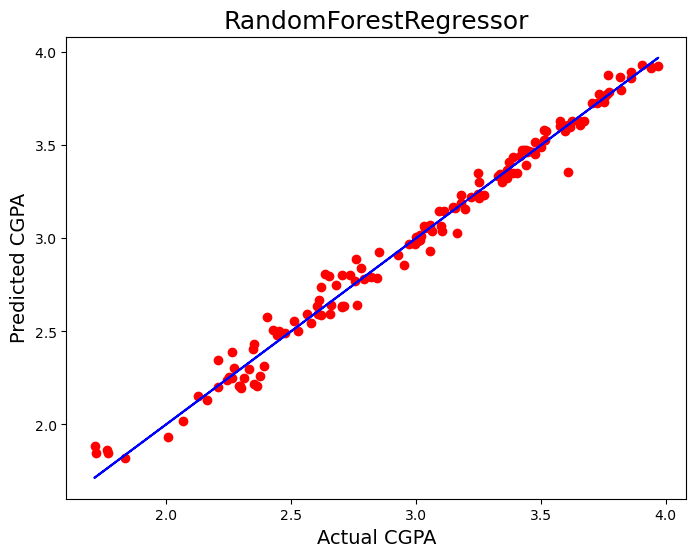

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rfcp,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual CGPA',fontsize=14)
plt.ylabel('Predicted CGPA',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.savefig('rfh.png')
plt.show()

In [124]:
import joblib
joblib.dump(rfcp,'RandomForestRegressorGrades.obj')

['RandomForestRegressorGrades.obj']

In [125]:
['RandomForestRegressorGrades.obj']

['RandomForestRegressorGrades.obj']

In [126]:
joblib.dump(lrh,'LinearRegressionGrades.obj')

['LinearRegressionGrades.obj']

In [127]:
['LinearRegressionGrades.obj']

['LinearRegressionGrades.obj']

In [ ]:
         #The End